# Performance Evaluation across all models and DP settings

## Imports

In [1]:
# Generic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import os

from scipy import io as sio
from scipy import signal as sps
from scipy import linalg as spl
from os.path import join as osj
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib as mpl

# Logging
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s",
    level=logging.INFO,
    datefmt="%Y-%m-%d %H:%M:%S"
)
logger = logging.getLogger()


## Functions

In [2]:
# ------------------------------------------------------------
# Beat visuals
def read_original_beats_single():
    with open(osj("..", "data_single", "dataset_beats", "5min_normal_beats.pkl"), "rb") as f:
        return pickle.load(f)

def read_original_beats_trio():
    with open(osj("..", "data_trio", "dataset_beats", "5min_normal_beats.pkl"), "rb") as f:
        return pickle.load(f)
    
def read_dp_beats_single(m):
    with open(osj("..", "dp_data_single", "dataset_beats", m + "_5min_normal_beats.pkl"), "rb") as f:
        return pickle.load(f)

def read_dp_beats_trio(m):
    with open(osj("..", "dp_data_trio", "dataset_beats", m + "_5min_normal_beats.pkl"), "rb") as f:
        return pickle.load(f)

# ------------------------------------------------------------
# Model performance
def load_performances(model, mechanism, e):
    with open(osj("..", "dp_models", model, mechanism, f"{e}_performance.pkl"), "rb") as f:
        perf_e = pickle.load(f)
    return perf_e

def load_real_performances(model):
    with open(osj("..", "savefolder", model, f"performance.pkl"), "rb") as f:
        perf_e = pickle.load(f)
    return perf_e

# ------------------------------------------------------------
# Attack performance
def load_real_shadow_performances(model):
    with open(osj("..", "dp_models", model, "no_dp", "performance.pkl"), "rb") as f:
        perf_e = pickle.load(f)
    return perf_e

## ECG Visualizations

In [33]:
import sszpalette
import matplotlib.cm as cm

In [ ]:
# register the ssz color palette
# colormaps = sszpalette.register()
# cmap = colormaps['diverging5rotgruen']
cmap = cm.get_cmap('harmonic6')



/home/rbeck1_sw/miniconda3/envs/torch_dpl/lib/python3.8/site-packages/sszpalette/__init__.py:51: UserWarning: Trying to register the cmap 'gray10' which already exists.
  plt.register_cmap(cmap=cmap)
/home/rbeck1_sw/miniconda3/envs/torch_dpl/lib/python3.8/site-packages/sszpalette/__init__.py:51: UserWarning: Trying to register the cmap 'gray10cool' which already exists.
  plt.register_cmap(cmap=cmap)
/home/rbeck1_sw/miniconda3/envs/torch_dpl/lib/python3.8/site-packages/sszpalette/__init__.py:51: UserWarning: Trying to register the cmap 'gray10warm' which already exists.
  plt.register_cmap(cmap=cmap)
/home/rbeck1_sw/miniconda3/envs/torch_dpl/lib/python3.8/site-packages/sszpalette/__init__.py:51: UserWarning: Trying to register the cmap 'harmonic6' which already exists.
  plt.register_cmap(cmap=cmap)
/home/rbeck1_sw/miniconda3/envs/torch_dpl/lib/python3.8/site-packages/sszpalette/__init__.py:51: UserWarning: Trying to register the cmap 'harmonic12' which already exists.
  plt.register_c

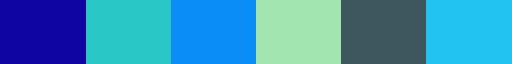

In [52]:
cmap

In [11]:
valid_patients = pd.read_csv(osj("..", "files", "valid_patients.csv"), header=None).to_numpy().reshape(-1)
valid_patients

array([100, 101, 103, 106, 108, 109, 111, 112, 113, 115, 116, 117, 118,
       119, 121, 122, 123, 124, 200, 203, 205, 208, 210, 212, 214, 215,
       219, 220, 221, 228, 230, 231, 232, 233])

### Laplace (trio)

In [3]:
ecg_original = read_original_beats_trio()
ecg_dp = read_dp_beats_trio("laplace")

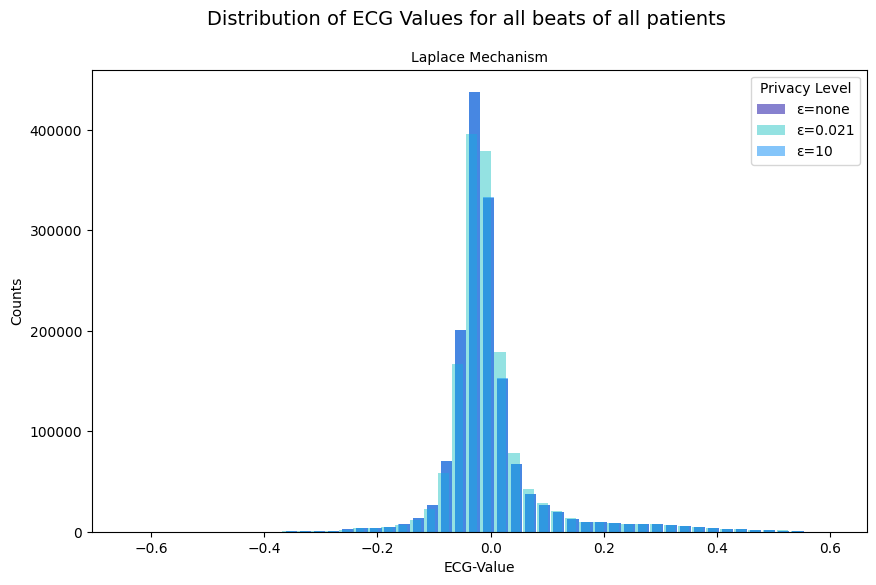

In [ ]:
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in valid_patients:
        if epsilon == "none":
            for beat in range(0, len(ecg_original[patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            for beat in range(0, len(ecg_dp[epsilon][patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])
                

# Plot the distributions
plt.figure(figsize=(10, 6))
colors = [cmap(i) for i in range(0, len(epsilon_values))]

#colors = ['green', 'red', 'blue']
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for all beats of all patients", fontsize=14)
plt.title("Laplace-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

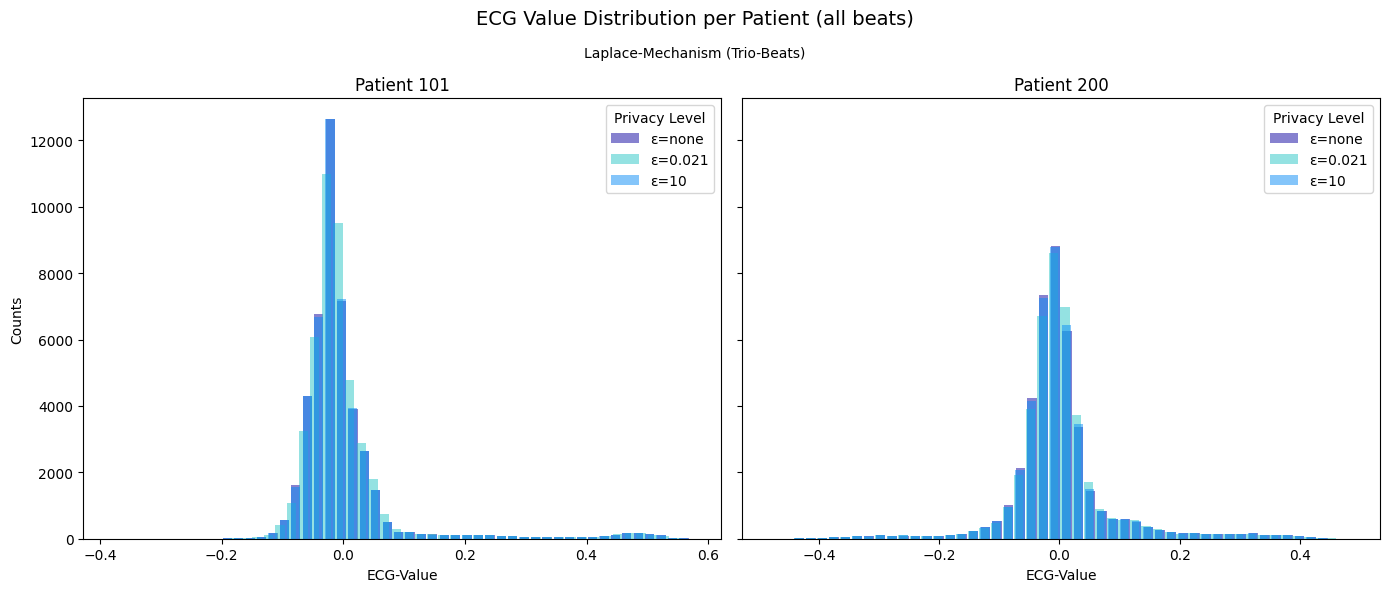

In [119]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]

colors = [cmap(i) for i in range(0, len(epsilon_values))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, patient in zip(axes, patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

    ax.set_title(f"Patient {patient}")
    ax.set_xlabel("ECG-Value")
    ax.legend(title="Privacy Level")

axes[0].set_ylabel("Counts")
plt.suptitle("ECG Value Distribution per Patient (all beats)", fontsize=14)
fig.text(0.5, 0.9, "Laplace-Mechanism (Trio-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

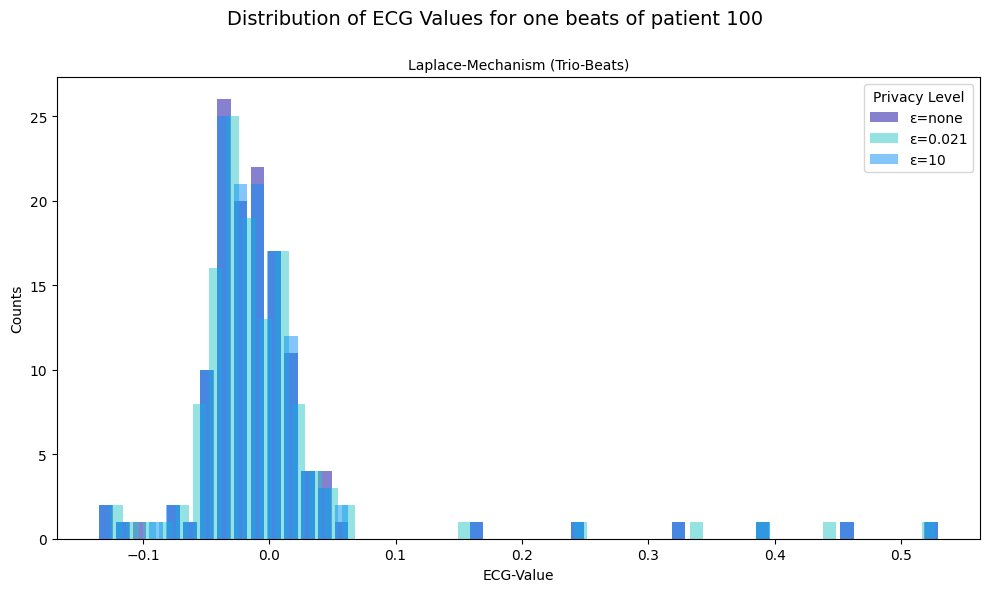

In [ ]:
patients = [100]
beat = 51 
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beat of patient 100", fontsize=14)
plt.title("Laplace-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

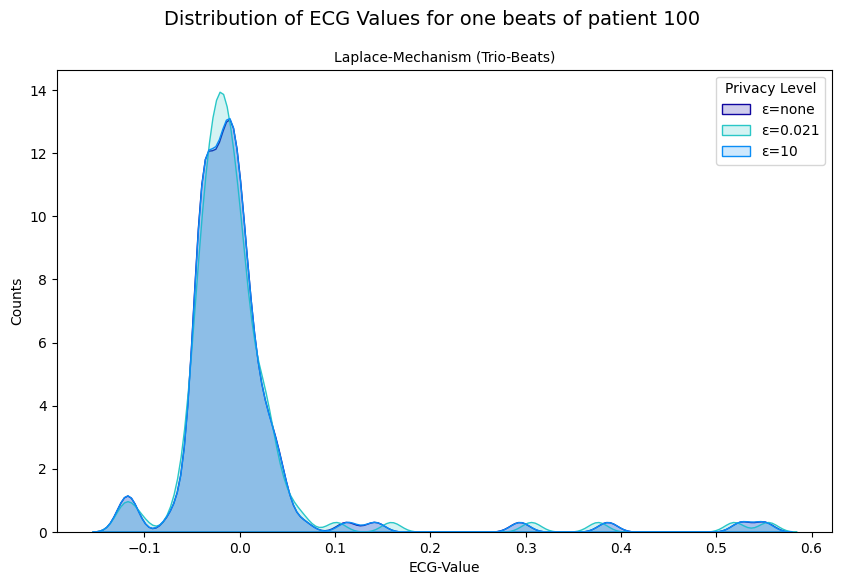

In [ ]:
patients = [100]
beat = 8
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    # plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    # sns.kdeplot(ecg_beat, color='green', edgecolor='green', fill=True, bw_adjust=0.7)
    sns.kdeplot(data, color=colors[i], label=f'ε={epsilon}', fill=True, bw_adjust=0.3, alpha=0.2)

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beat of patient 100", fontsize=14)
plt.title("Laplace-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

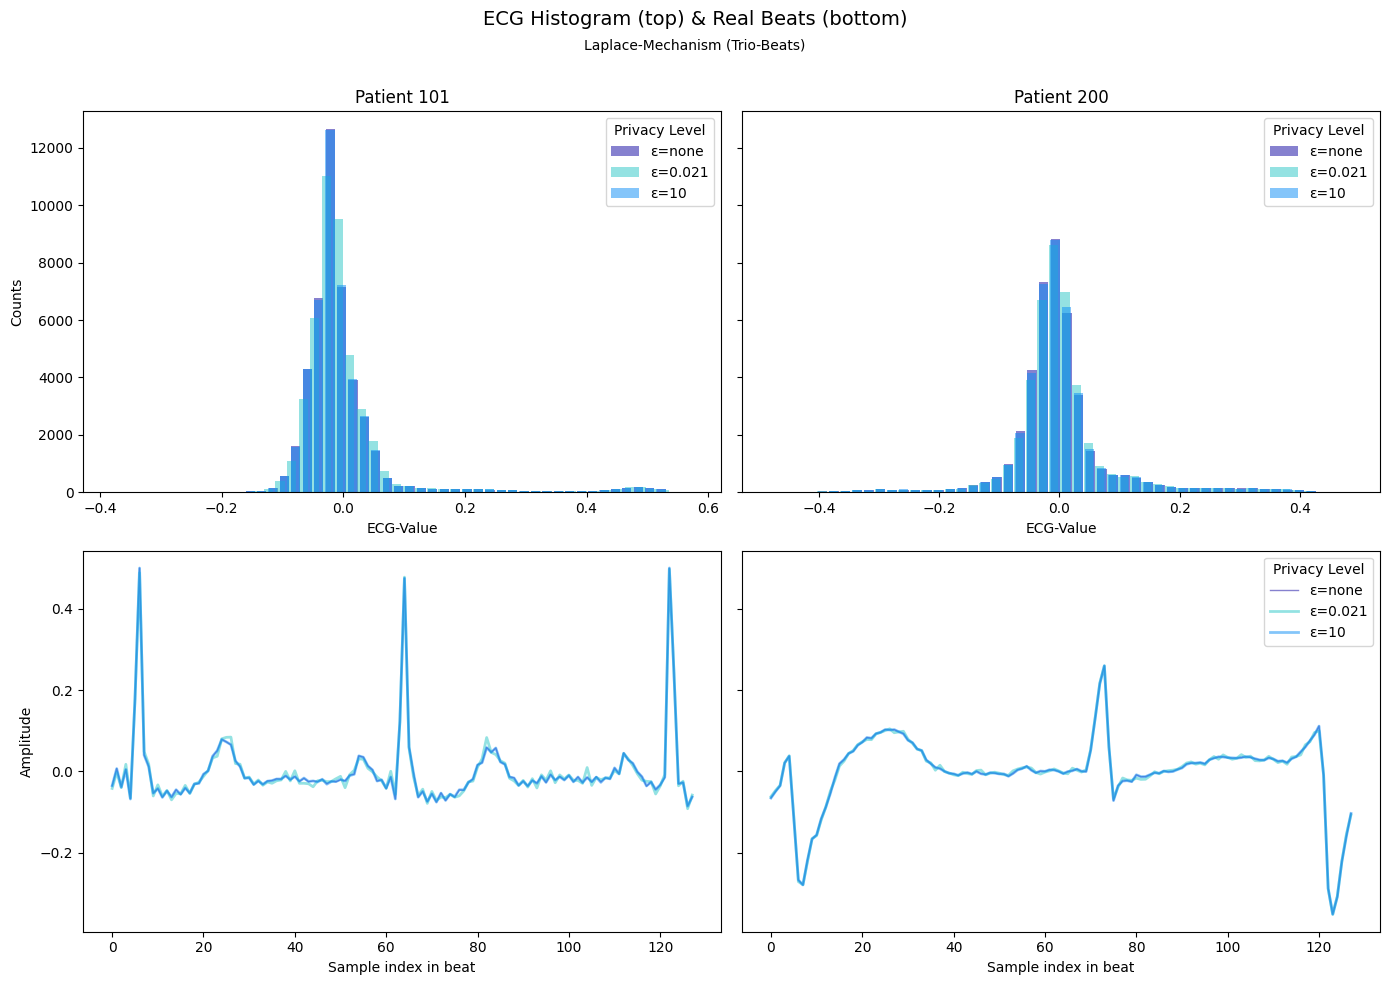

In [113]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]
colors = [cmap(i) for i in range(len(epsilon_values))]

beat_idx = 0

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')

for col, patient in enumerate(patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    # --------------------------
    # HISTOGRAM (first row)
    # --------------------------
    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    ax_hist = axes[0, col]
    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax_hist.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    ax_hist.set_title(f"Patient {patient}")
    ax_hist.set_xlabel("ECG-Value")
    if col == 0:
        ax_hist.set_ylabel("Counts")
    ax_hist.legend(title="Privacy Level")

    # --------------------------
    # ECG-BEATS (second rorw)
    # --------------------------
    ax_line = axes[1, col]
    for i, epsilon in enumerate(epsilon_values):
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']

        ax_line.plot(
            beats[beat_idx],
            label=f'ε={epsilon}',
            color=colors[i],
            alpha=0.5,
            linewidth=1 if epsilon == "none" else 2
        )
    ax_line.set_xlabel("Sample index in beat")
    if col == 0:
        ax_line.set_ylabel("Amplitude")
    if col == len(patients) - 1:
        ax_line.legend(title="Privacy Level")

fig.suptitle("ECG Histogram (top) & Real Beats (bottom)", fontsize=14)
fig.text(0.5, 0.94, "Laplace-Mechanism (Trio-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Laplace (single)

In [130]:
ecg_original = read_original_beats_single()
ecg_dp = read_dp_beats_single("laplace")

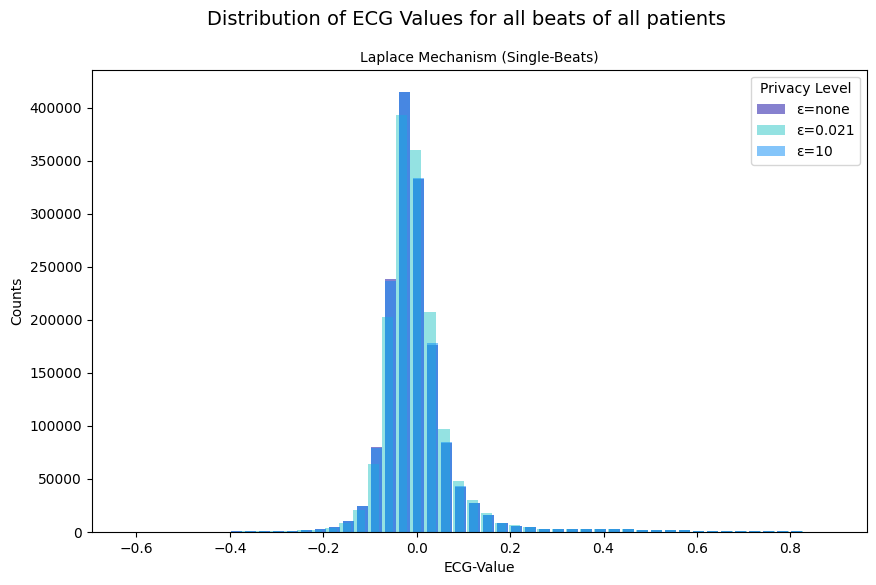

In [ ]:
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in valid_patients:
        if epsilon == "none":
            for beat in range(0, len(ecg_original[patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            for beat in range(0, len(ecg_dp[epsilon][patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])
                

# Plot the distributions
plt.figure(figsize=(10, 6))
colors = [cmap(i) for i in range(0, len(epsilon_values))]

#colors = ['green', 'red', 'blue']
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for all beats of all patients", fontsize=14)
plt.title("Laplace-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

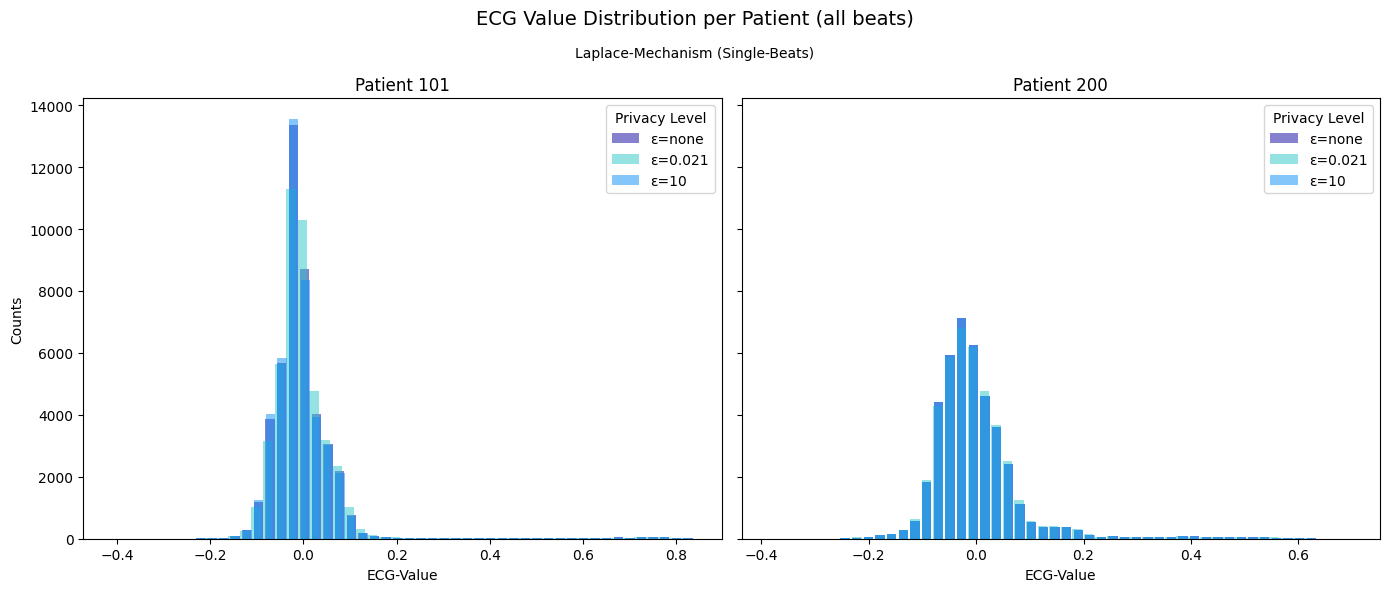

In [134]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]

colors = [cmap(i) for i in range(0, len(epsilon_values))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, patient in zip(axes, patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

    ax.set_title(f"Patient {patient}")
    ax.set_xlabel("ECG-Value")
    ax.legend(title="Privacy Level")

axes[0].set_ylabel("Counts")
plt.suptitle("ECG Value Distribution per Patient (all beats)", fontsize=14)
fig.text(0.5, 0.9, "Laplace-Mechanism (Single-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

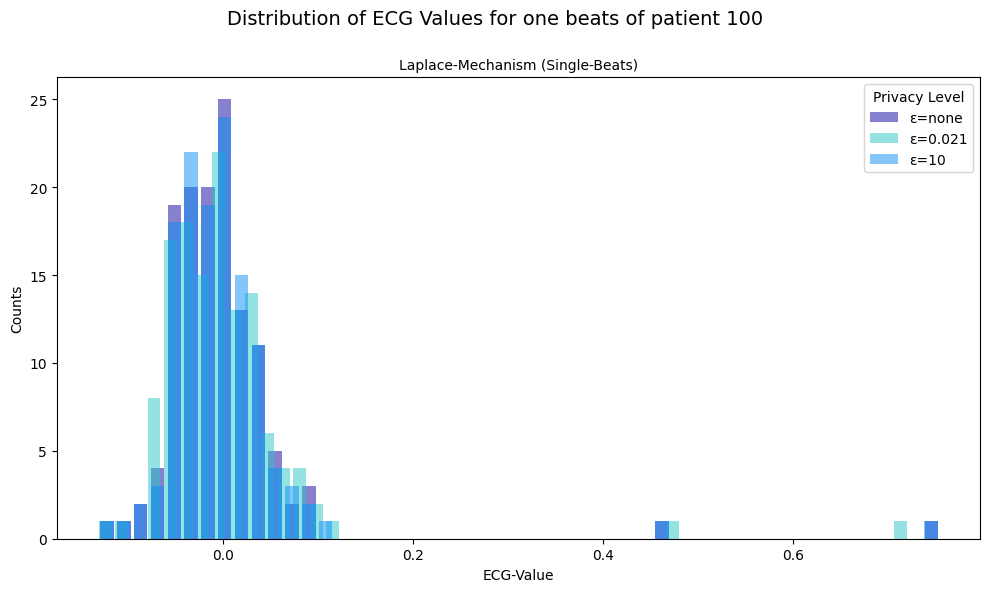

In [135]:
patients = [100]
beat = 51 
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("Laplace-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

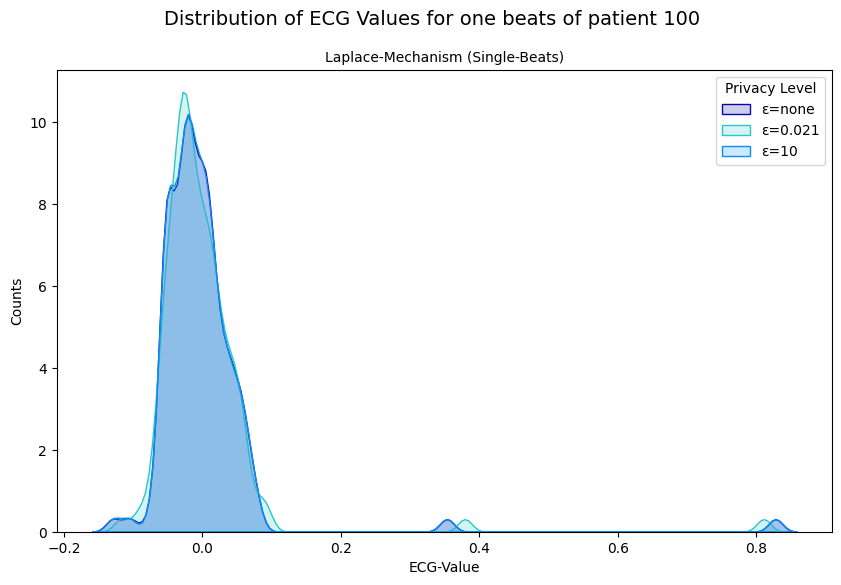

In [136]:
patients = [100]
beat = 8
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    # plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    # sns.kdeplot(ecg_beat, color='green', edgecolor='green', fill=True, bw_adjust=0.7)
    sns.kdeplot(data, color=colors[i], label=f'ε={epsilon}', fill=True, bw_adjust=0.3, alpha=0.2)

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("Laplace-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

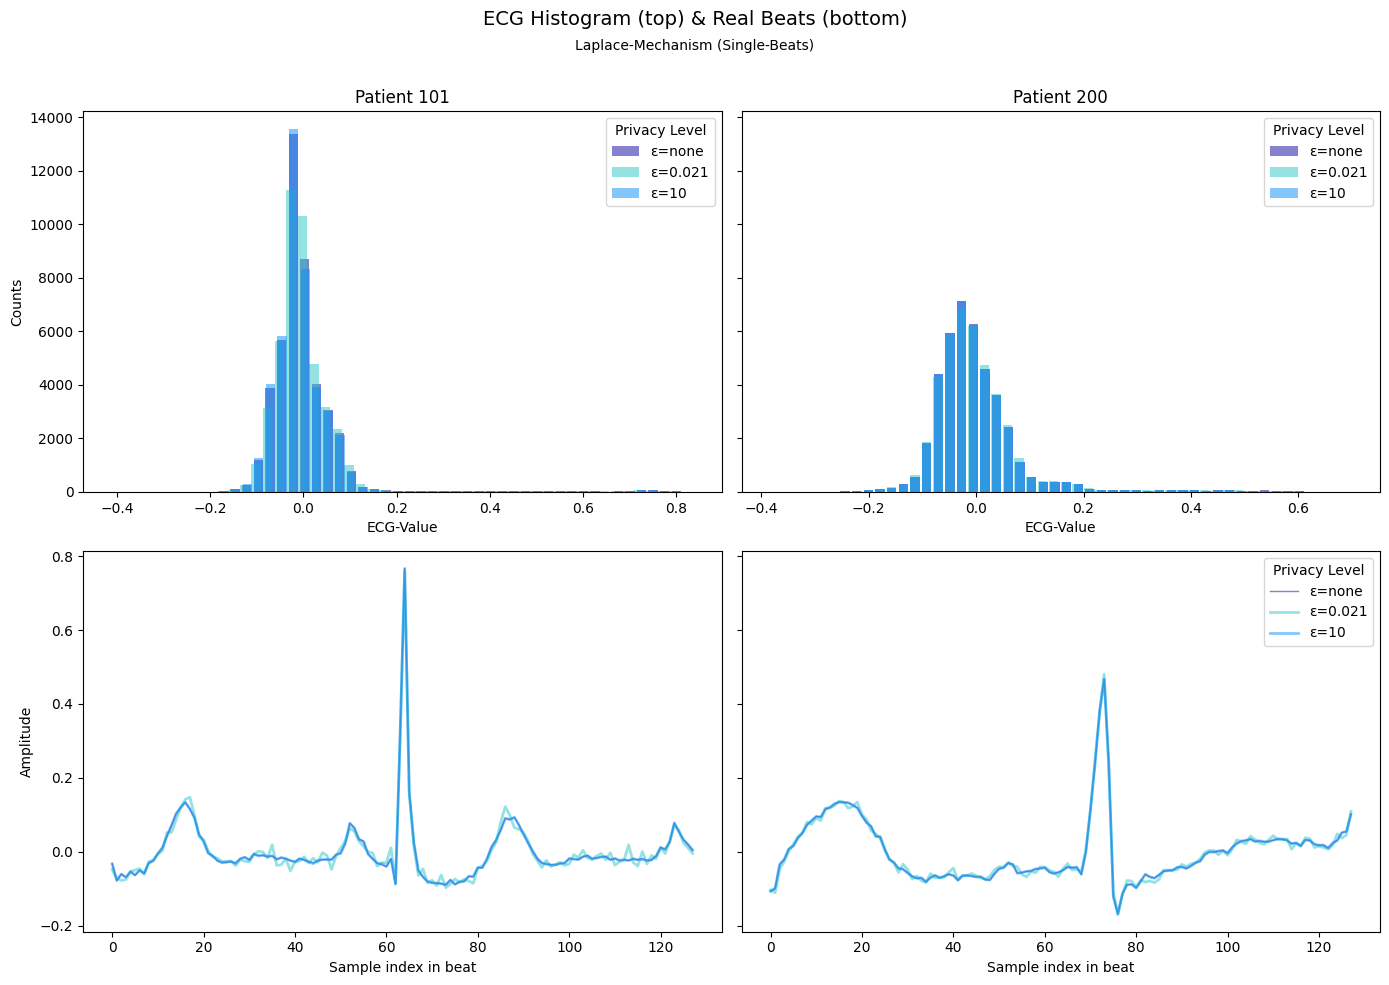

In [ ]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]
colors = [cmap(i) for i in range(len(epsilon_values))]

beat_idx = 0

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')

for col, patient in enumerate(patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    # --------------------------
    # HISTOGRAM (first row)
    # --------------------------
    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    ax_hist = axes[0, col]
    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax_hist.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    ax_hist.set_title(f"Patient {patient}")
    ax_hist.set_xlabel("ECG-Value")
    if col == 0:
        ax_hist.set_ylabel("Counts")
    ax_hist.legend(title="Privacy Level")

    # --------------------------
    # ECG-BEATS (second rorw)
    # --------------------------
    ax_line = axes[1, col]
    for i, epsilon in enumerate(epsilon_values):
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']

        ax_line.plot(
            beats[beat_idx],
            label=f'ε={epsilon}',
            color=colors[i],
            alpha=0.5,
            linewidth=1 if epsilon == "none" else 2
        )
    ax_line.set_xlabel("Beat index")
    if col == 0:
        ax_line.set_ylabel("Amplitude")
    if col == len(patients) - 1:
        ax_line.legend(title="Privacy Level")

fig.suptitle("ECG Histogram (top) & ECG Beat (bottom)", fontsize=14)
fig.text(0.5, 0.94, "Laplace-Mechanism (Single-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Laplace Bounded Noise (trio)

In [151]:
ecg_original = read_original_beats_trio()
ecg_dp = read_dp_beats_trio("laplace")

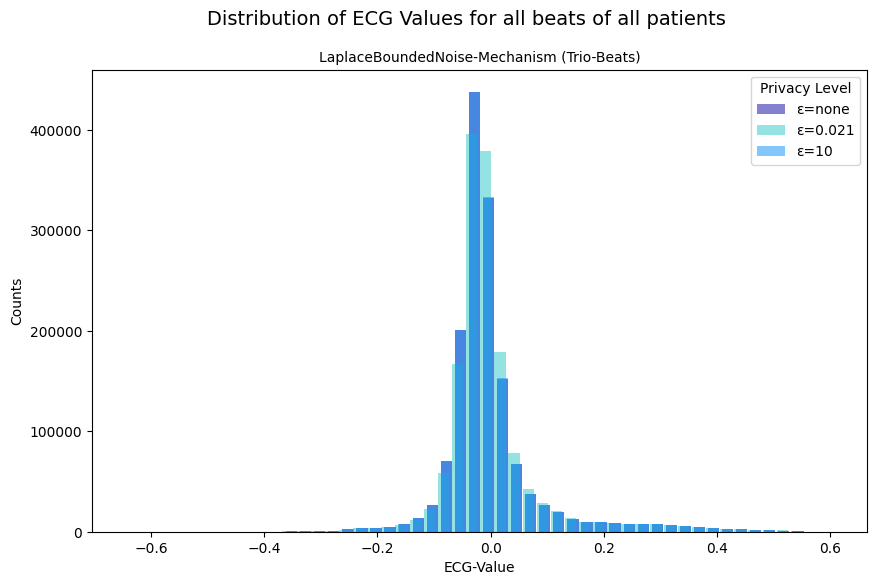

In [157]:
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in valid_patients:
        if epsilon == "none":
            for beat in range(0, len(ecg_original[patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            for beat in range(0, len(ecg_dp[epsilon][patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])
                

# Plot the distributions
plt.figure(figsize=(10, 6))
colors = [cmap(i) for i in range(0, len(epsilon_values))]

#colors = ['green', 'red', 'blue']
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for all beats of all patients", fontsize=14)
plt.title("LaplaceBoundedNoise-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

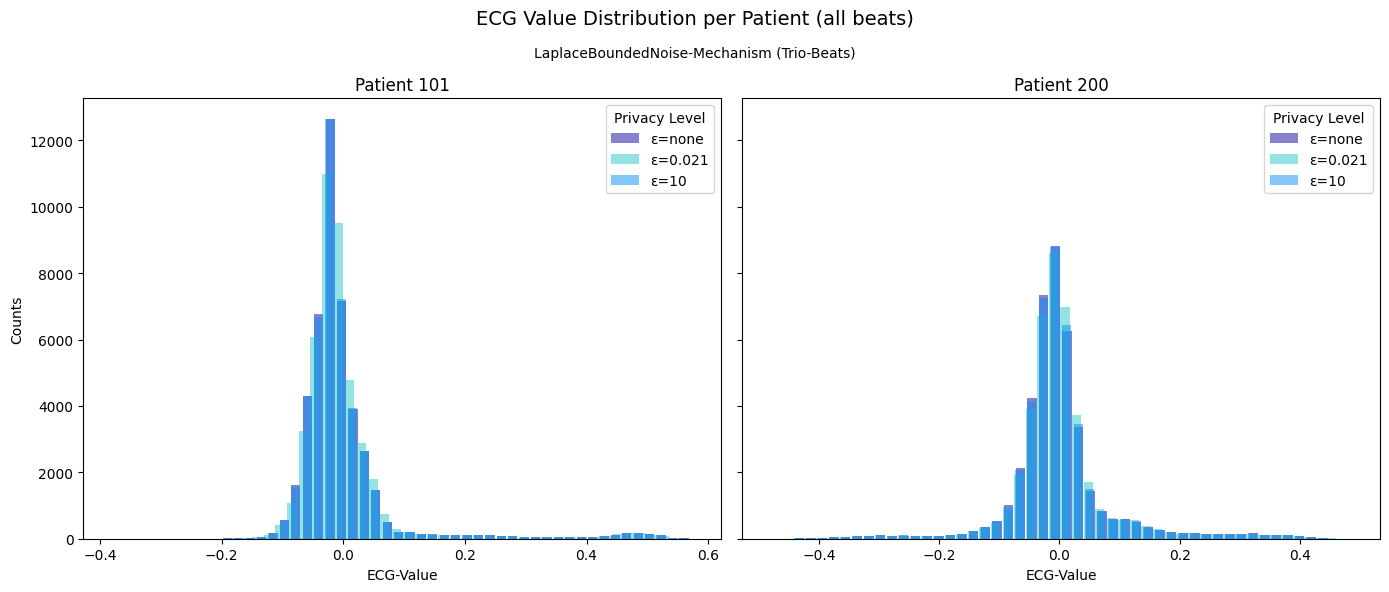

In [153]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]

colors = [cmap(i) for i in range(0, len(epsilon_values))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, patient in zip(axes, patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

    ax.set_title(f"Patient {patient}")
    ax.set_xlabel("ECG-Value")
    ax.legend(title="Privacy Level")

axes[0].set_ylabel("Counts")
plt.suptitle("ECG Value Distribution per Patient (all beats)", fontsize=14)
fig.text(0.5, 0.9, "LaplaceBoundedNoise-Mechanism (Trio-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

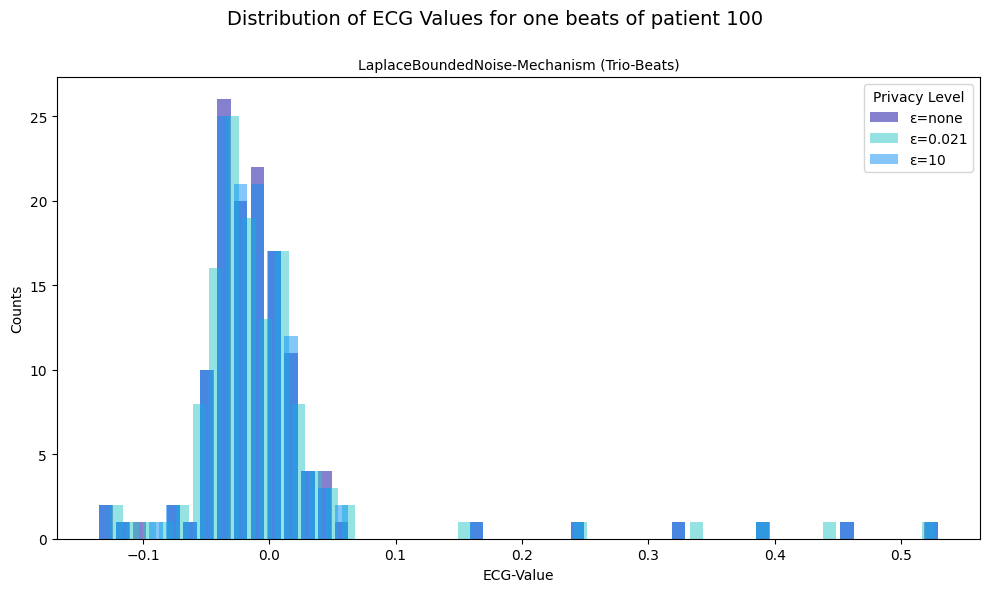

In [154]:
patients = [100]
beat = 51 
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("LaplaceBoundedNoise-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

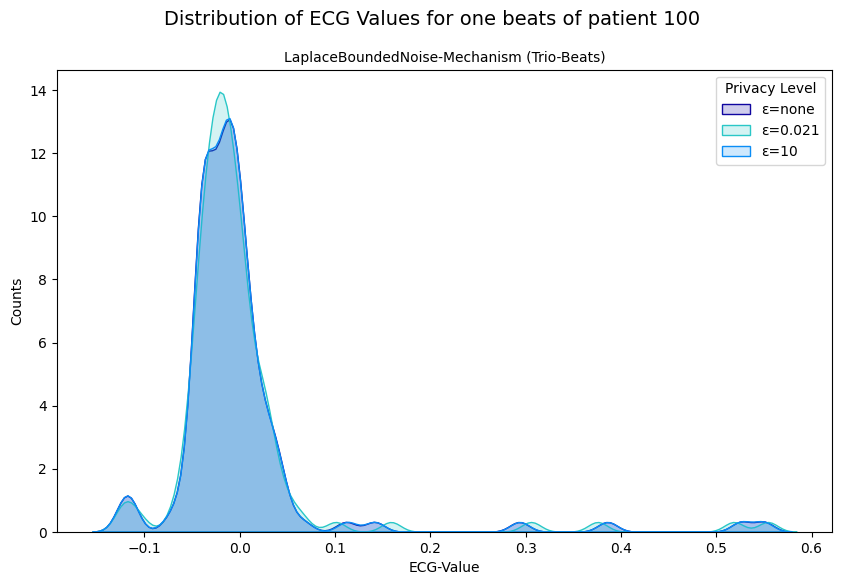

In [155]:
patients = [100]
beat = 8
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    # plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    # sns.kdeplot(ecg_beat, color='green', edgecolor='green', fill=True, bw_adjust=0.7)
    sns.kdeplot(data, color=colors[i], label=f'ε={epsilon}', fill=True, bw_adjust=0.3, alpha=0.2)

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("LaplaceBoundedNoise-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

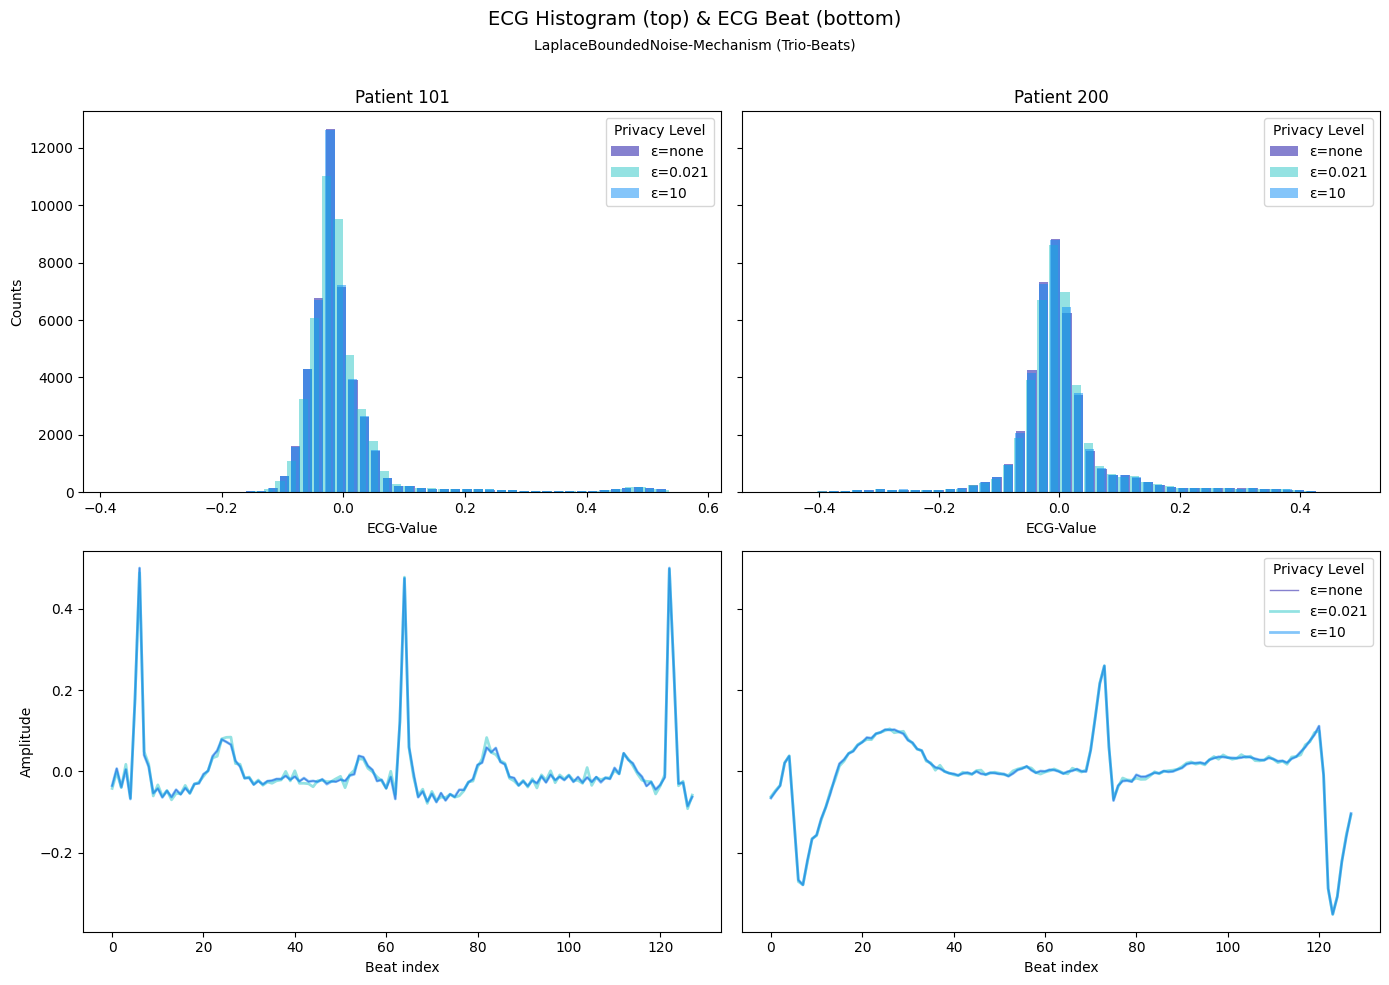

In [156]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]
colors = [cmap(i) for i in range(len(epsilon_values))]

beat_idx = 0

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')

for col, patient in enumerate(patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    # --------------------------
    # HISTOGRAM (first row)
    # --------------------------
    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    ax_hist = axes[0, col]
    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax_hist.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    ax_hist.set_title(f"Patient {patient}")
    ax_hist.set_xlabel("ECG-Value")
    if col == 0:
        ax_hist.set_ylabel("Counts")
    ax_hist.legend(title="Privacy Level")

    # --------------------------
    # ECG-BEATS (second rorw)
    # --------------------------
    ax_line = axes[1, col]
    for i, epsilon in enumerate(epsilon_values):
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']

        ax_line.plot(
            beats[beat_idx],
            label=f'ε={epsilon}',
            color=colors[i],
            alpha=0.5,
            linewidth=1 if epsilon == "none" else 2
        )
    ax_line.set_xlabel("Beat index")
    if col == 0:
        ax_line.set_ylabel("Amplitude")
    if col == len(patients) - 1:
        ax_line.legend(title="Privacy Level")

fig.suptitle("ECG Histogram (top) & ECG Beat (bottom)", fontsize=14)
fig.text(0.5, 0.94, "LaplaceBoundedNoise-Mechanism (Trio-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Laplace Bounded Noise (single)

In [158]:
ecg_original = read_original_beats_single()
ecg_dp = read_dp_beats_single("bounded_n")

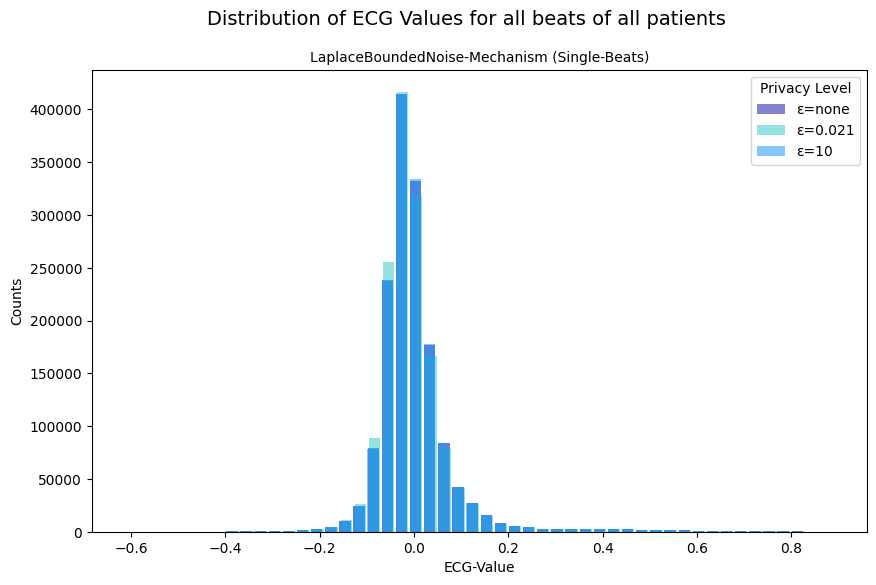

In [160]:
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in valid_patients:
        if epsilon == "none":
            for beat in range(0, len(ecg_original[patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            for beat in range(0, len(ecg_dp[epsilon][patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])
                

# Plot the distributions
plt.figure(figsize=(10, 6))
colors = [cmap(i) for i in range(0, len(epsilon_values))]

#colors = ['green', 'red', 'blue']
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for all beats of all patients", fontsize=14)
plt.title("LaplaceBoundedNoise-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

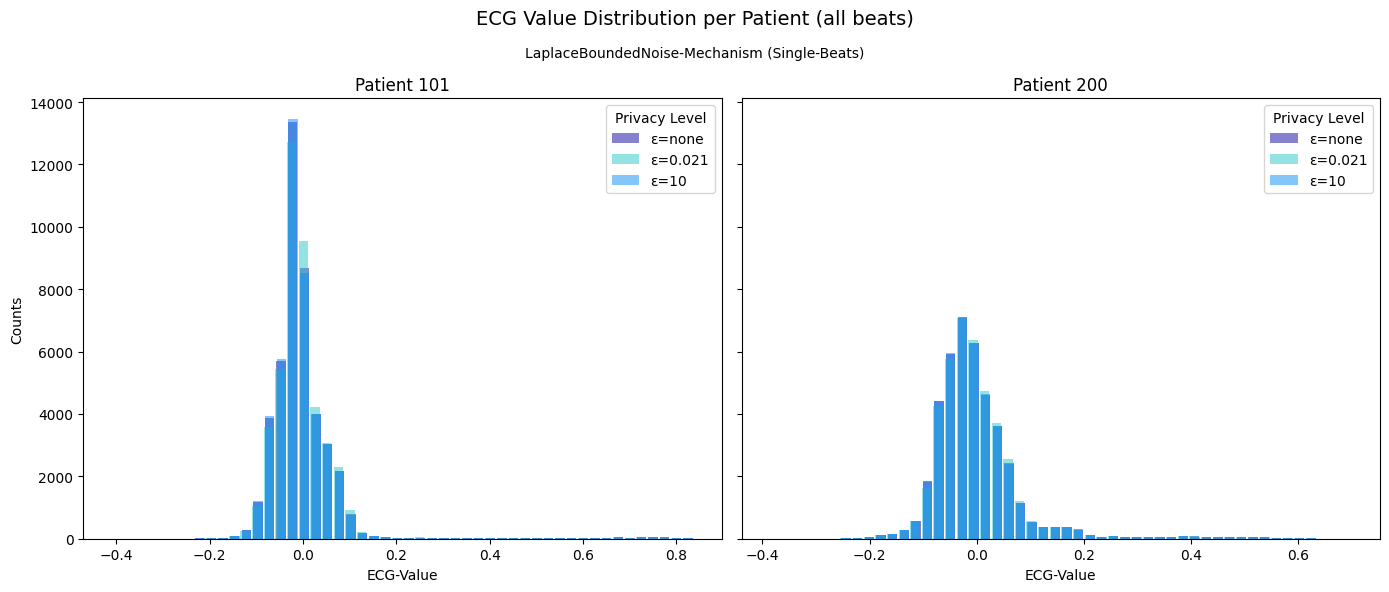

In [161]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]

colors = [cmap(i) for i in range(0, len(epsilon_values))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, patient in zip(axes, patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

    ax.set_title(f"Patient {patient}")
    ax.set_xlabel("ECG-Value")
    ax.legend(title="Privacy Level")

axes[0].set_ylabel("Counts")
plt.suptitle("ECG Value Distribution per Patient (all beats)", fontsize=14)
fig.text(0.5, 0.9, "LaplaceBoundedNoise-Mechanism (Single-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

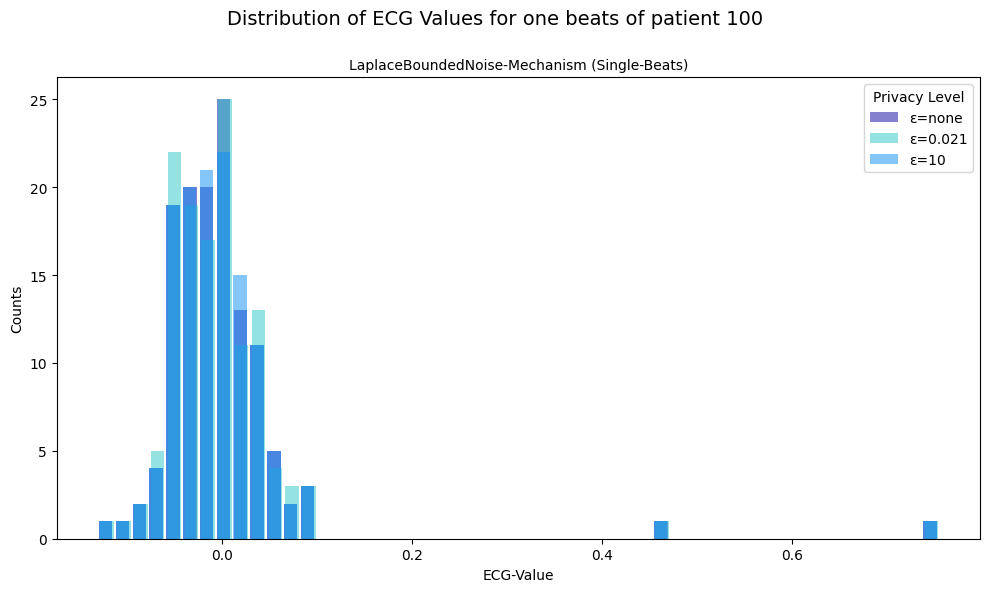

In [162]:
patients = [100]
beat = 51 
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("LaplaceBoundedNoise-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

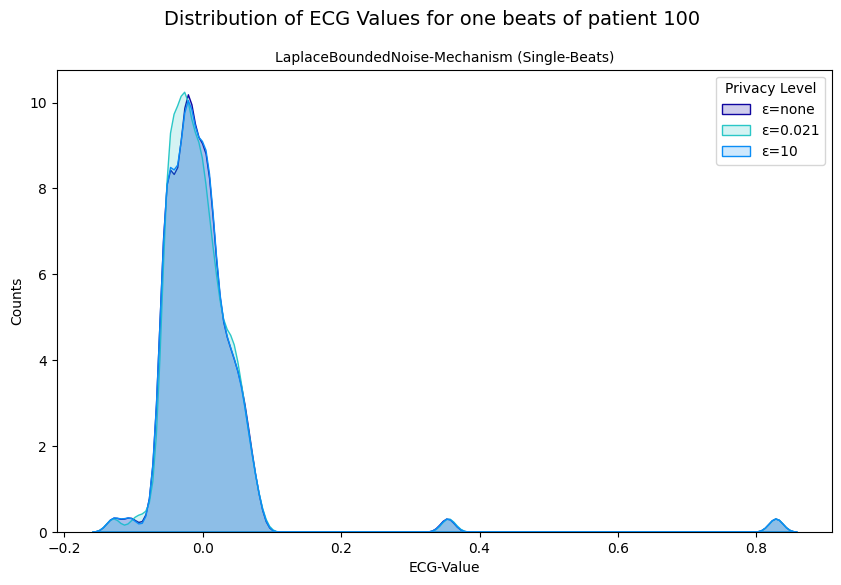

In [163]:
patients = [100]
beat = 8
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    # plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    # sns.kdeplot(ecg_beat, color='green', edgecolor='green', fill=True, bw_adjust=0.7)
    sns.kdeplot(data, color=colors[i], label=f'ε={epsilon}', fill=True, bw_adjust=0.3, alpha=0.2)

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("LaplaceBoundedNoise-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

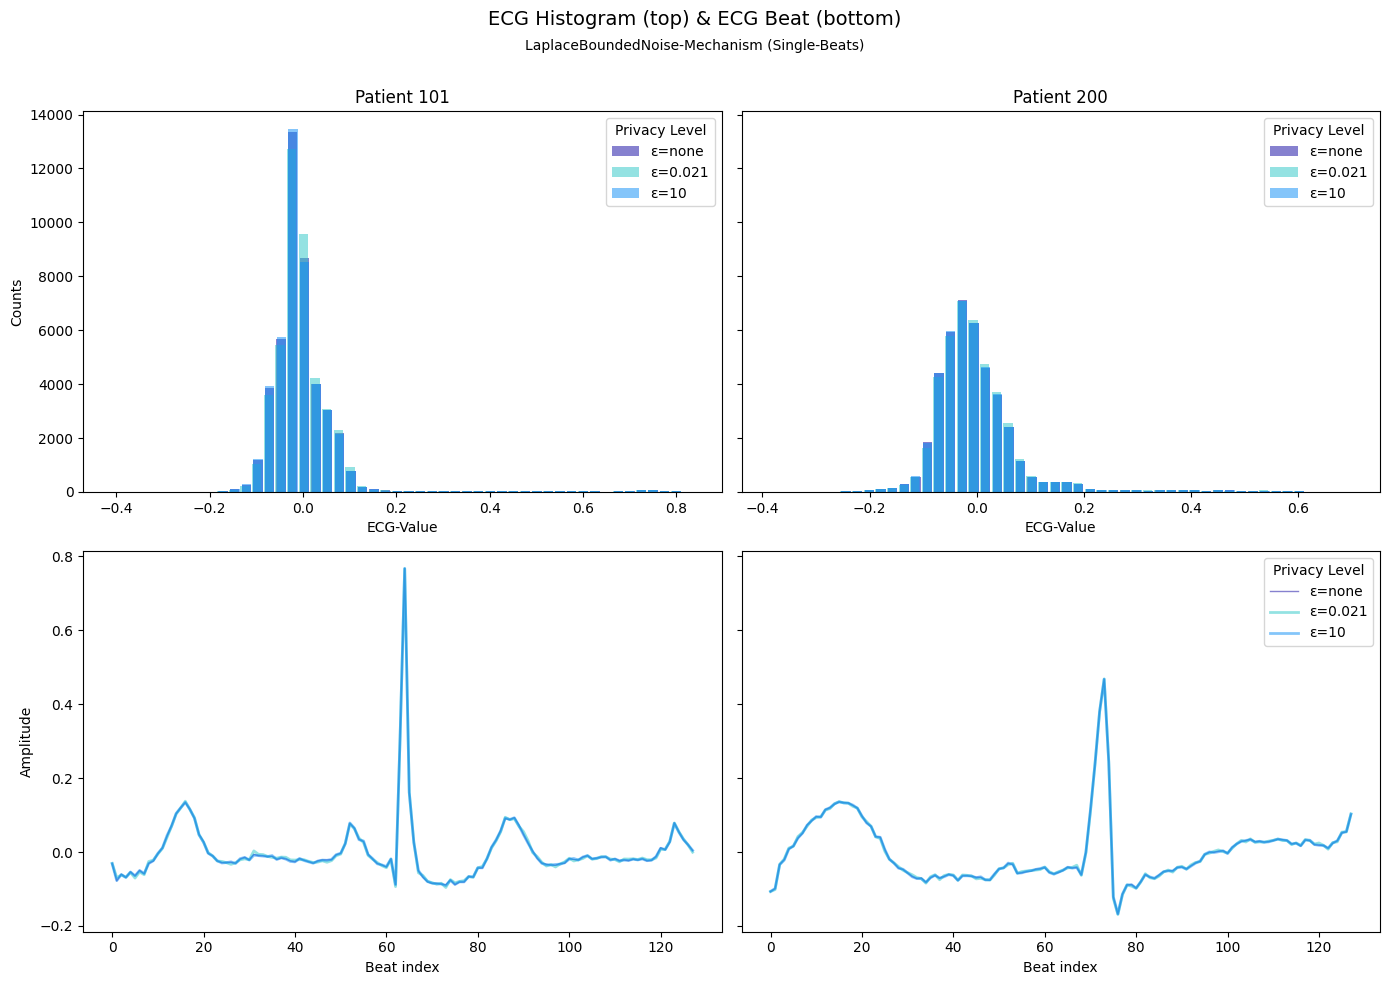

In [164]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]
colors = [cmap(i) for i in range(len(epsilon_values))]

beat_idx = 0

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')

for col, patient in enumerate(patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    # --------------------------
    # HISTOGRAM (first row)
    # --------------------------
    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    ax_hist = axes[0, col]
    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax_hist.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    ax_hist.set_title(f"Patient {patient}")
    ax_hist.set_xlabel("ECG-Value")
    if col == 0:
        ax_hist.set_ylabel("Counts")
    ax_hist.legend(title="Privacy Level")

    # --------------------------
    # ECG-BEATS (second rorw)
    # --------------------------
    ax_line = axes[1, col]
    for i, epsilon in enumerate(epsilon_values):
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']

        ax_line.plot(
            beats[beat_idx],
            label=f'ε={epsilon}',
            color=colors[i],
            alpha=0.5,
            linewidth=1 if epsilon == "none" else 2
        )
    ax_line.set_xlabel("Beat index")
    if col == 0:
        ax_line.set_ylabel("Amplitude")
    if col == len(patients) - 1:
        ax_line.legend(title="Privacy Level")

fig.suptitle("ECG Histogram (top) & ECG Beat (bottom)", fontsize=14)
fig.text(0.5, 0.94, "LaplaceBoundedNoise-Mechanism (Single-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### GaussianAnalytics (trio)

In [138]:
ecg_original = read_original_beats_trio()
ecg_dp = read_dp_beats_trio("gaussian_a")

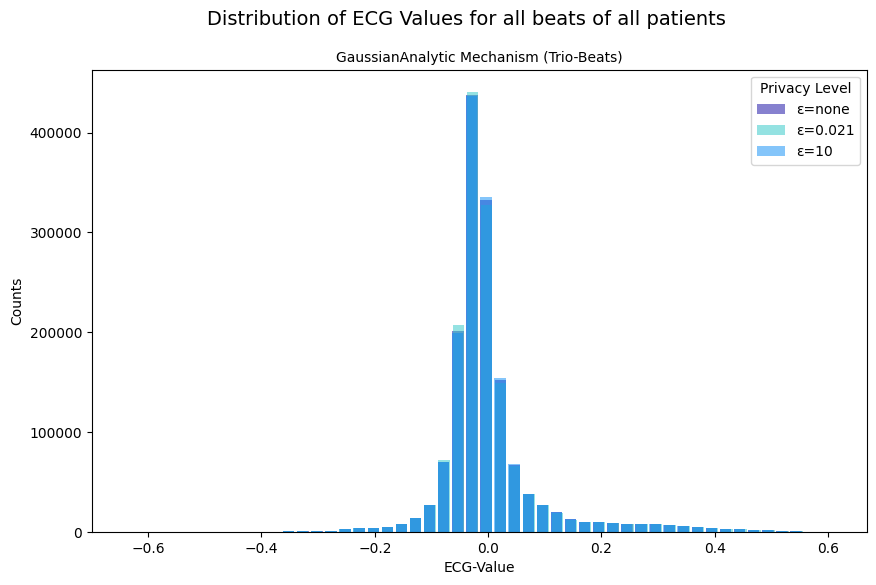

In [ ]:
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in valid_patients:
        if epsilon == "none":
            for beat in range(0, len(ecg_original[patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            for beat in range(0, len(ecg_dp[epsilon][patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])
                

# Plot the distributions
plt.figure(figsize=(10, 6))
colors = [cmap(i) for i in range(0, len(epsilon_values))]

#colors = ['green', 'red', 'blue']
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for all beats of all patients", fontsize=14)
plt.title("GaussianAnalytic-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

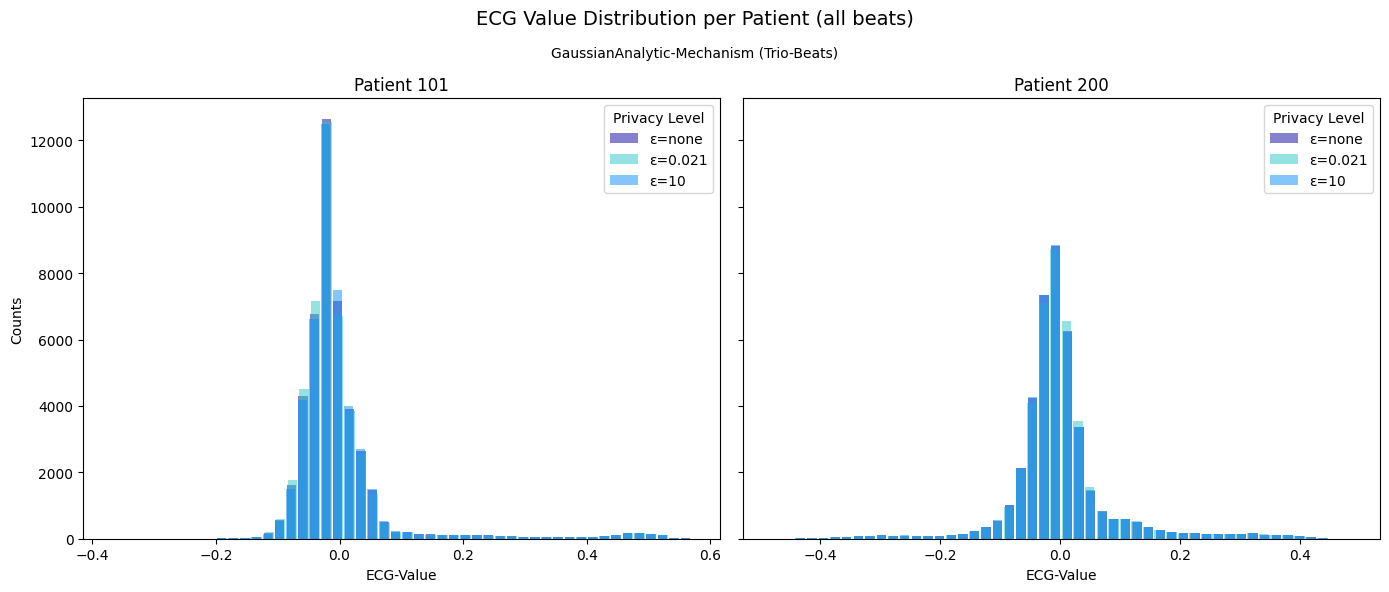

In [140]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]

colors = [cmap(i) for i in range(0, len(epsilon_values))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, patient in zip(axes, patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

    ax.set_title(f"Patient {patient}")
    ax.set_xlabel("ECG-Value")
    ax.legend(title="Privacy Level")

axes[0].set_ylabel("Counts")
plt.suptitle("ECG Value Distribution per Patient (all beats)", fontsize=14)
fig.text(0.5, 0.9, "GaussianAnalytic-Mechanism (Trio-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

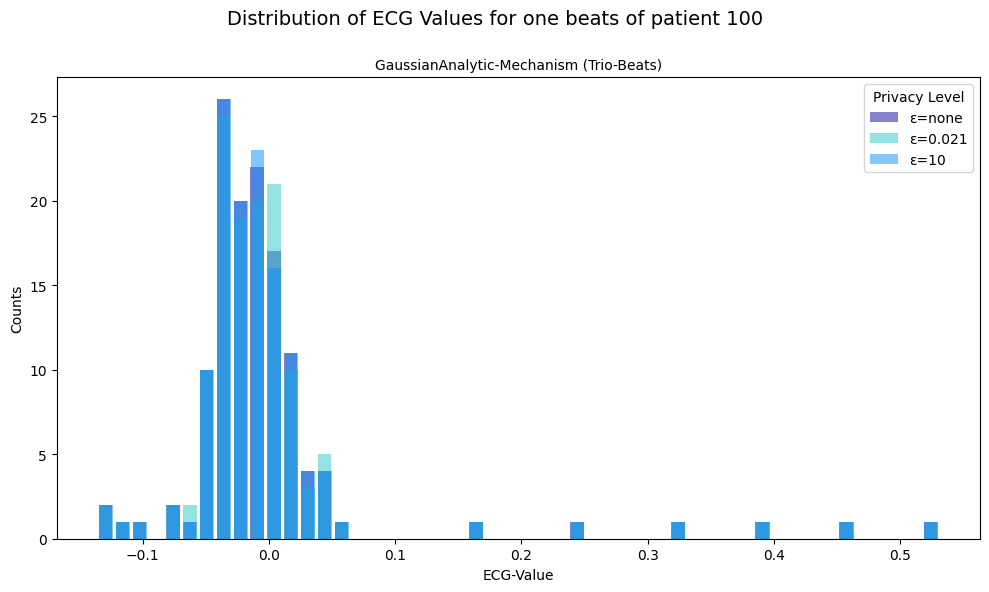

In [141]:
patients = [100]
beat = 51 
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("GaussianAnalytic-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

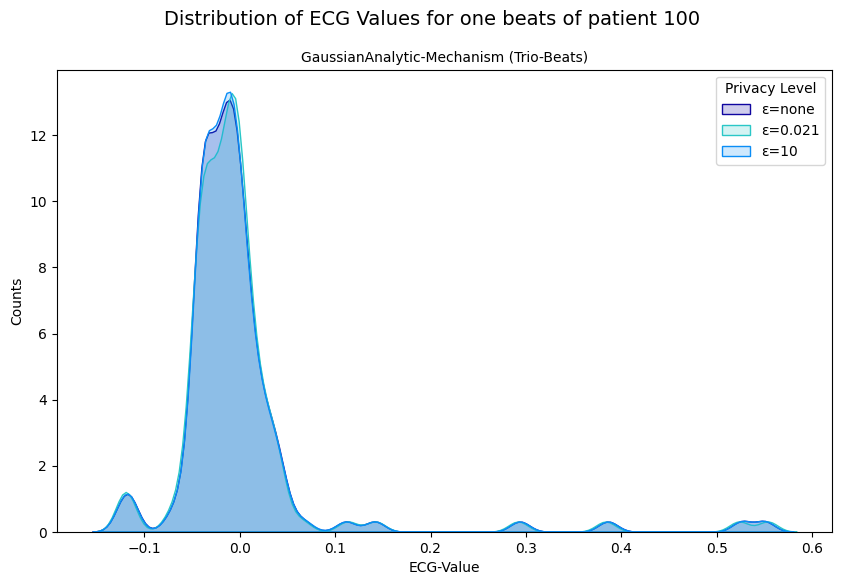

In [142]:
patients = [100]
beat = 8
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    # plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    # sns.kdeplot(ecg_beat, color='green', edgecolor='green', fill=True, bw_adjust=0.7)
    sns.kdeplot(data, color=colors[i], label=f'ε={epsilon}', fill=True, bw_adjust=0.3, alpha=0.2)

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("GaussianAnalytic-Mechanism (Trio-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

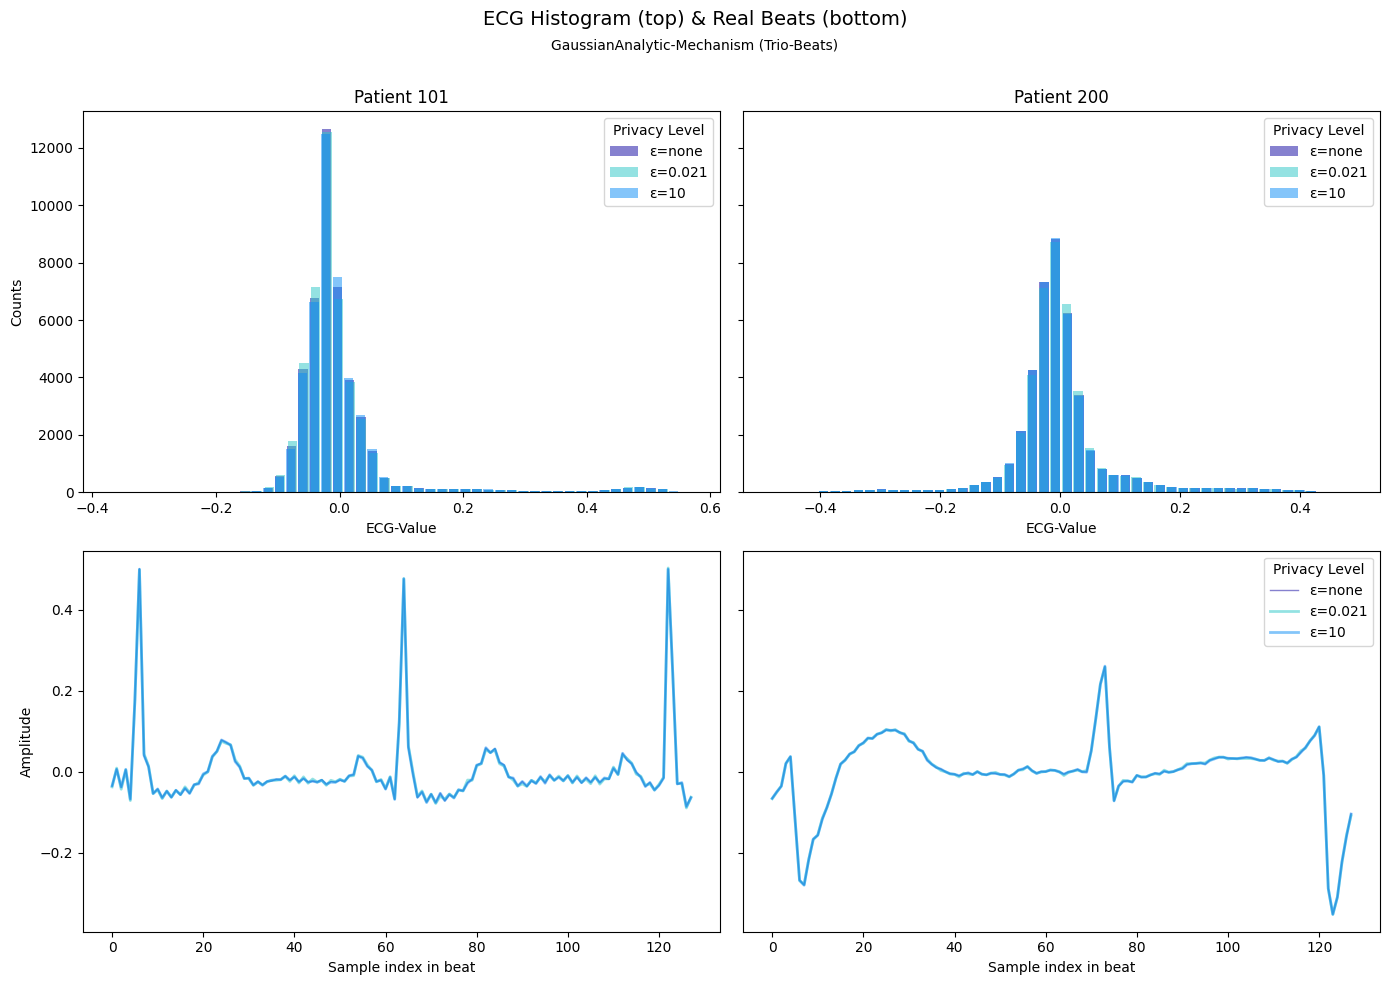

In [ ]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]
colors = [cmap(i) for i in range(len(epsilon_values))]

beat_idx = 0

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')

for col, patient in enumerate(patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    # --------------------------
    # HISTOGRAM (first row)
    # --------------------------
    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    ax_hist = axes[0, col]
    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax_hist.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    ax_hist.set_title(f"Patient {patient}")
    ax_hist.set_xlabel("ECG-Value")
    if col == 0:
        ax_hist.set_ylabel("Counts")
    ax_hist.legend(title="Privacy Level")

    # --------------------------
    # ECG-BEATS (second rorw)
    # --------------------------
    ax_line = axes[1, col]
    for i, epsilon in enumerate(epsilon_values):
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']

        ax_line.plot(
            beats[beat_idx],
            label=f'ε={epsilon}',
            color=colors[i],
            alpha=0.5,
            linewidth=1 if epsilon == "none" else 2
        )
    ax_line.set_xlabel("Beat index")
    if col == 0:
        ax_line.set_ylabel("Amplitude")
    if col == len(patients) - 1:
        ax_line.legend(title="Privacy Level")

fig.suptitle("ECG Histogram (top) & ECG Beat (bottom)", fontsize=14)
fig.text(0.5, 0.94, "GaussianAnalytic-Mechanism (Trio-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Gaussian Analytics (single)

In [ ]:
ecg_original = read_original_beats_single()
ecg_dp = read_dp_beats_single("gaussian_a")

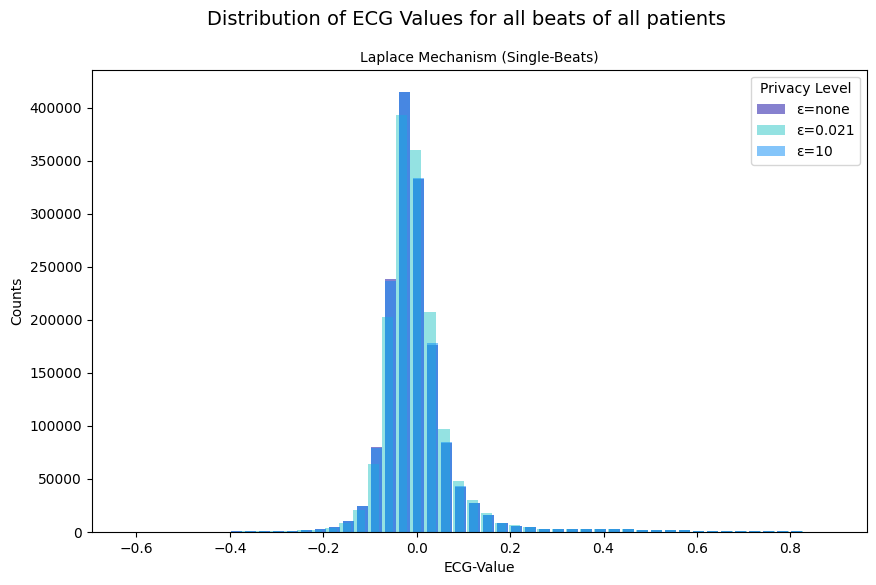

In [ ]:
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in valid_patients:
        if epsilon == "none":
            for beat in range(0, len(ecg_original[patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            for beat in range(0, len(ecg_dp[epsilon][patient]['beats'])):
                data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])
                

# Plot the distributions
plt.figure(figsize=(10, 6))
colors = [cmap(i) for i in range(0, len(epsilon_values))]

#colors = ['green', 'red', 'blue']
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for all beats of all patients", fontsize=14)
plt.title("GaussianAnalytic-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

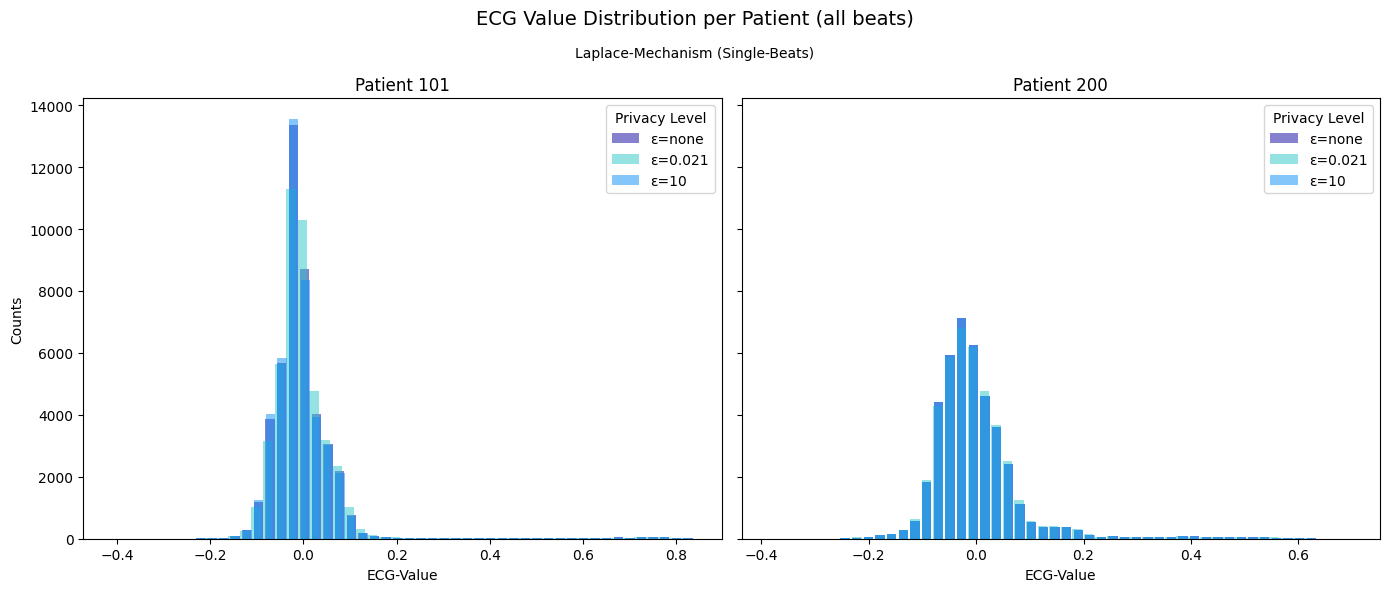

In [ ]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]

colors = [cmap(i) for i in range(0, len(epsilon_values))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, patient in zip(axes, patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

    ax.set_title(f"Patient {patient}")
    ax.set_xlabel("ECG-Value")
    ax.legend(title="Privacy Level")

axes[0].set_ylabel("Counts")
plt.suptitle("ECG Value Distribution per Patient (all beats)", fontsize=14)
fig.text(0.5, 0.9, "GaussianAnalytic-Mechanism (Single-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

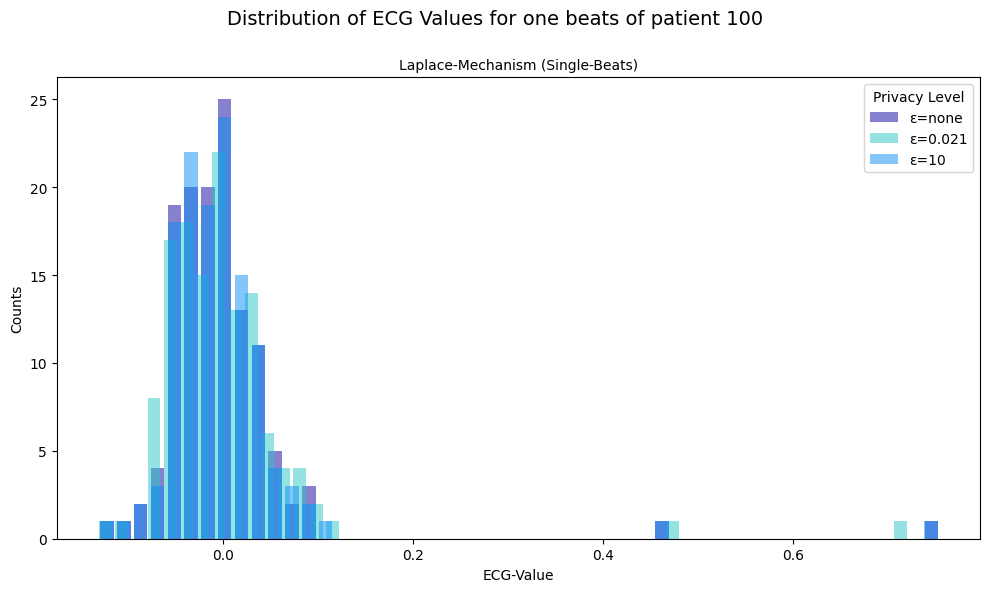

In [ ]:
patients = [100]
beat = 51 
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("GaussianAnalytic-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

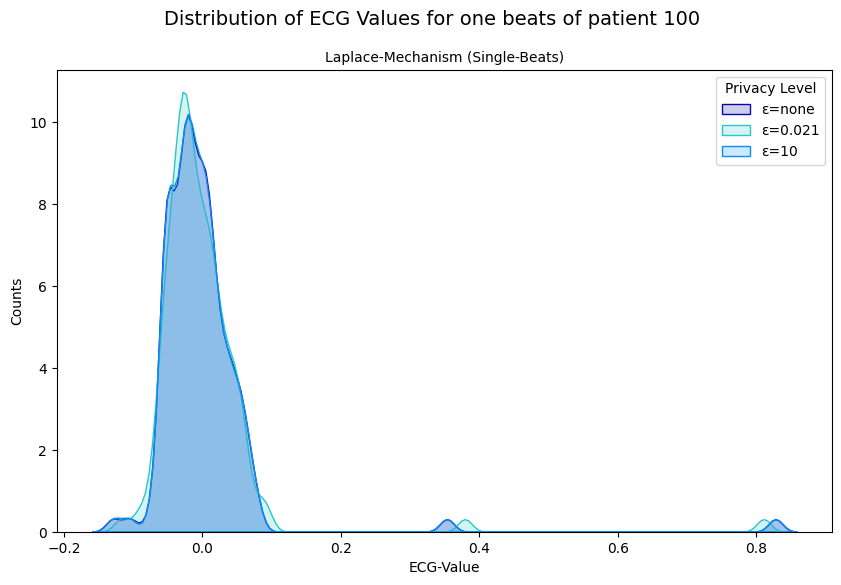

In [ ]:
patients = [100]
beat = 8
epsilon_values = ["none", 0.021, 10]  

data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    for patient in patients:
        if epsilon == "none":
            data_by_epsilon[epsilon].extend(ecg_original[patient]['beats'][beat])
        else:
            data_by_epsilon[epsilon].extend(ecg_dp[epsilon][patient]['beats'][beat])

# Plot the distributions
plt.figure(figsize=(10, 6))

colors = [cmap(i) for i in range(0, len(epsilon_values))]
for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
    # plt.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    # sns.kdeplot(ecg_beat, color='green', edgecolor='green', fill=True, bw_adjust=0.7)
    sns.kdeplot(data, color=colors[i], label=f'ε={epsilon}', fill=True, bw_adjust=0.3, alpha=0.2)

plt.xlabel("ECG-Value")
plt.ylabel("Counts")
plt.suptitle("Distribution of ECG Values for one beats of patient 100", fontsize=14)
plt.title("GaussianAnalytic-Mechanism (Single-Beats)", fontsize=10)
plt.legend(title="Privacy Level")
plt.show()

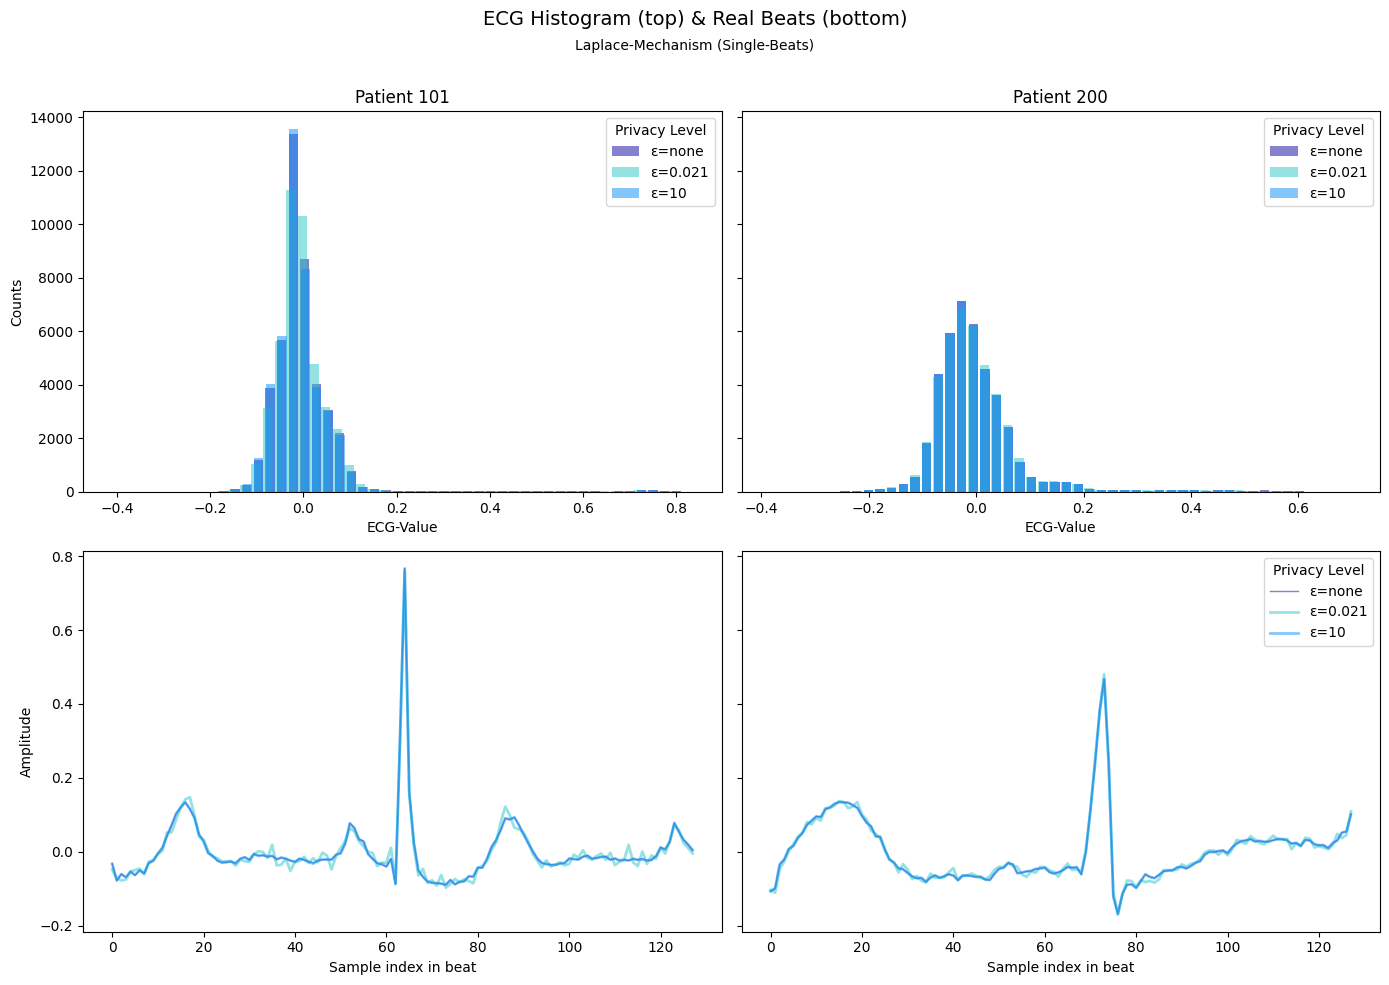

In [ ]:
patients = [101, 200]
epsilon_values = ["none", 0.021, 10]
colors = [cmap(i) for i in range(len(epsilon_values))]

beat_idx = 0

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')

for col, patient in enumerate(patients):
    data_by_epsilon = {epsilon: [] for epsilon in epsilon_values}

    # --------------------------
    # HISTOGRAM (first row)
    # --------------------------
    for epsilon in epsilon_values:
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']
        for beat in beats:
            data_by_epsilon[epsilon].extend(beat)

    ax_hist = axes[0, col]
    for i, (epsilon, data) in enumerate(data_by_epsilon.items()):
        ax_hist.hist(data, bins=50, alpha=0.5, rwidth=0.8, color=colors[i], label=f'ε={epsilon}')
    ax_hist.set_title(f"Patient {patient}")
    ax_hist.set_xlabel("ECG-Value")
    if col == 0:
        ax_hist.set_ylabel("Counts")
    ax_hist.legend(title="Privacy Level")

    # --------------------------
    # ECG-BEATS (second rorw)
    # --------------------------
    ax_line = axes[1, col]
    for i, epsilon in enumerate(epsilon_values):
        beats = ecg_original[patient]['beats'] if epsilon == "none" else ecg_dp[epsilon][patient]['beats']

        ax_line.plot(
            beats[beat_idx],
            label=f'ε={epsilon}',
            color=colors[i],
            alpha=0.5,
            linewidth=1 if epsilon == "none" else 2
        )
    ax_line.set_xlabel("Beat index")
    if col == 0:
        ax_line.set_ylabel("Amplitude")
    if col == len(patients) - 1:
        ax_line.legend(title="Privacy Level")

fig.suptitle("ECG Histogram (top) & ECG Beat (bottom)", fontsize=14)
fig.text(0.5, 0.94, "GaussianAnalytic-Mechanism (Single-Beats)", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Performance Evaluation

### Load performances

In [3]:
model = ["DA", "Ens_val"]
p_method = ["laplace", "bounded_n", "gaussian_a", "laplace_truedp"]
all_performances = {"DA": {}, "Ens_val": {}, "DA_shadow": {}, "Ens_val_shadow": {}}

# load dp performances
for m in model:
    model_performance = {}

    for mechanism in p_method:
        if mechanism == "bounded_n":
            hp_epsilon_values = [0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081, 0.091,
                                0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91,
                                1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.91,
                                2.01, 2.51, 2.91,
                                3.01, 3.51, 3.91,
                                4.01, 4.51, 4.91,
                                5.01, 5.51, 5.91,
                                6.01, 6.51, 6.91,
                                7.01, 7.51, 7.91,
                                8.01, 8.51, 8.91,
                                9.01, 9.51, 9.91, 10]
        elif mechanism == "laplace_truedp":
            hp_epsilon_values = [0.00001, 0.0001, 0.001, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081, 0.091, 
                                 0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91,
                                 1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.91] #  ready but not used, since the others also don't have them 1.61, 1.71, 1.81,
        else:
            hp_epsilon_values = [0.00001, 0.0001, 0.001, 
                                0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081, 0.091,
                                0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91,
                                1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.91,
                                2.01, 2.51, 2.91,
                                3.01, 3.51, 3.91,
                                4.01, 4.51, 4.91,
                                5.01, 5.51, 5.91,
                                6.01, 6.51, 6.91,
                                7.01, 7.51, 7.91,
                                8.01, 8.51, 8.91,
                                9.01, 9.51, 9.91, 10]
            
        mechanism_performance = {}
        
        for epsilon in hp_epsilon_values:
            if os.path.exists(osj("..", "dp_models", m, mechanism, f"{epsilon}_performance.pkl")):   
                perf = load_performances(m, mechanism, epsilon)
                mechanism_performance[epsilon] = perf
            else: 
                logger.info(f"{m}: Skipping missing {epsilon} for {mechanism} ...")  

        model_performance[mechanism] = mechanism_performance

    all_performances[m] = model_performance

# load real performances
for m in model:
    perf = load_real_performances(m)
    all_performances[m]["no_dp"] = perf


# sh_model = ["DA_shadow", "Ens_val_shadow"]

# # load dp shadow performances
# for m in sh_model:
#     model_performance = {}

#     for mechanism in p_method:
#         hp_epsilon_values = [0.01, 0.31, 0.41, 0.51, 0.71, 0.91, 1.01, 1.21, 1.51, 2.01]
#         mechanism_performance = {}
        
#         for epsilon in hp_epsilon_values:
#             if os.path.exists(osj("..", "dp_models", m, mechanism, f"{epsilon}_performance.pkl")):   
#                 perf = load_performances(m, mechanism, epsilon)
#                 mechanism_performance[epsilon] = perf
#             else: 
#                # logger.info(f"Skipping missing {epsilon} for {mechanism} ...")  

#         model_performance[mechanism] = mechanism_performance

#     all_performances[m] = model_performance

# # load real shadow performances
# for m in sh_model:
#     perf = load_real_shadow_performances(m)
#     all_performances[m]["no_dp"] = perf


In [4]:
data = []

for model, mechanisms in all_performances.items():
    for mechanism, epsilons in mechanisms.items():
        if isinstance(epsilons, dict) and all(isinstance(v, dict) for v in epsilons.values()):
            for epsilon, values in epsilons.items():
                if isinstance(values, dict) and all(isinstance(v, dict) for v in values.values()) and epsilon not in ("DA", "NPE", "ENS"):
                    # Case: DA_Ens with Submodels
                    for submodel, metrics in values.items():
                        for metric, value in metrics.items():
                            record = {"Model": submodel, "Method": mechanism, "Epsilon": epsilon, "Metric": metric, "Value": value}
                            data.append(record)
                elif epsilon in ("DA", "ENS"):
                    # Case: DA_Ens with Submodels but without epsilon (Real performances)
                    for metric, value in values.items():
                        record = {"Model": epsilon, "Method": mechanism, "Epsilon": None, "Metric": metric, "Value": value}
                        data.append(record)
                elif epsilon == "NPE":
                    continue
                else:
                    # Case: without Submodels
                    for metric, value in values.items():
                        record = {"Model": model, "Method": mechanism, "Epsilon": epsilon, "Metric": metric, "Value": value}
                        data.append(record)
        else:
            # Case: Real performances without epsilon
            for metric, value in epsilons.items():
                record = {"Model": model, "Method": mechanism, "Epsilon": None, "Metric": metric, "Value": value}
                data.append(record)

df_performances = pd.DataFrame(data, columns=["Model", "Method", "Epsilon", "Metric", "Value"])


### Stats

In [5]:
df_performances["Model"].value_counts()

Ens_val    1110
DA         1110
Name: Model, dtype: int64

#### Unique epsilons (per DP method)

In [6]:
np.set_printoptions(suppress=True) 

unique_epsilons_per_model = df_performances.groupby("Method")["Epsilon"].unique()
unique_epsilons_per_model = unique_epsilons_per_model.to_dict()

for model, epsilons in unique_epsilons_per_model.items():
    print(f"{model}: {sorted(epsilons)}")

bounded_n: [0.01, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081, 0.091, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.91, 2.01, 2.51, 2.91, 3.01, 3.51, 3.91, 4.01, 4.51, 4.91, 5.01, 5.51, 5.91, 6.01, 6.51, 6.91, 7.01, 7.51, 7.91, 8.01, 8.51, 8.91, 9.01, 9.51, 9.91, 10.0]
gaussian_a: [1e-05, 0.0001, 0.001, 0.01, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081, 0.091, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.91, 2.01, 2.51, 2.91, 3.01, 3.51, 3.91, 4.01, 4.51, 4.91, 5.01, 5.51, 5.91, 6.01, 6.51, 6.91, 7.01, 7.51, 7.91, 8.01, 8.51, 8.91, 9.01, 9.51, 9.91, 10.0]
laplace: [1e-05, 0.0001, 0.001, 0.01, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081, 0.091, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.91, 2.01, 2.51, 2.91, 3.01, 3.51, 3.91, 4.01, 4.51, 4.91, 5.01, 5.51, 5.91, 6.01, 6.51, 6.91, 7.01, 7.51, 7.91, 8.01, 8.51, 8.91, 9.01, 9.51, 9.91, 10.

In [7]:
df_results_f1 = df_performances[df_performances["Metric"] == "f1"]

#### DA

In [8]:
da_perf = df_performances[df_performances["Model"] == "DA"]
da_perf_f1 = da_perf[da_perf["Metric"] == "f1"]

##### per model

In [9]:
# ---- Best in total ----
# Get the best setup for the model
da_best_total = da_perf_f1.loc[da_perf_f1["Value"].idxmax()]
# da_best_total
# -->
# Model              DA
# Method     gaussian_a
# Epsilon          0.71
# Metric             f1
# Value        0.946444

# Get the n best setups for the model
da_best_n = da_perf_f1.nlargest(5, "Value")
# da_best_n
# --> 
# 1 gaussian_a (0.71), 
# 2 bounded_n  (0.71), 
# 3 laplace    (5.91), 
# 4 gaussian_a (4.51), 
# 5 bounded_n  (1.21)

# ---- Worst in total ----
# Get the worst setup for the model
da_last_total = da_perf_f1.loc[da_perf_f1["Value"].idxmin()]
# da_last_total
# -->
# Model                  DA
# Method     laplace_truedp
# Epsilon             0.011
# Metric                 f1
# Value            0.609942

# Get the n worst setups for the model
da_last_n = da_perf_f1.nsmallest(5, "Value")
# da_last_n
# all laplace_truedp (0.00001 - 0.0021)



In [11]:
# da_best_total
da_best_n
# da_last_total
# da_last_n

Model      Method  Epsilon Metric     Value
731    DA  gaussian_a     0.71     f1  0.946444
413    DA   bounded_n     0.71     f1  0.946379
239    DA     laplace     5.91     f1  0.946301
833    DA  gaussian_a     4.51     f1  0.945707
443    DA   bounded_n     1.21     f1  0.945646

In [12]:
attack_setups = da_best_n[["Model", "Method", "Epsilon"]].drop_duplicates() # 5 best setups
attack_setups = pd.concat([attack_setups, da_last_n[["Model", "Method", "Epsilon"]]], ignore_index=True) # 5 worst setups
len(attack_setups)
# 10 in total

10

In [48]:
relevant_metrics = ["f1", "acc", "rec", "spe", "pre"]

# ---- Best in total (all metrics) ----
da_best_keys = da_best_n[["Model", "Method", "Epsilon"]]

da_mask_best = df_performances.set_index(["Model", "Method", "Epsilon"]).index.isin(da_best_keys.set_index(["Model", "Method", "Epsilon"]).index)
da_best_keys_details = df_performances[da_mask_best]
da_best_keys_details = da_best_keys_details[da_best_keys_details["Metric"].isin(relevant_metrics)]


# ---- Last in total (all metrics) ----
da_last_keys = da_last_n[["Model", "Method", "Epsilon"]]

da_mask_best = df_performances.set_index(["Model", "Method", "Epsilon"]).index.isin(da_last_keys.set_index(["Model", "Method", "Epsilon"]).index)
da_last_keys_details = df_performances[da_mask_best]
da_last_keys_details = da_last_keys_details[da_last_keys_details["Metric"].isin(relevant_metrics)]

In [49]:
da_best_keys_details

Model      Method  Epsilon Metric     Value
234    DA     laplace     5.91    acc  0.986136
235    DA     laplace     5.91    rec  0.987794
236    DA     laplace     5.91    spe  0.985902
237    DA     laplace     5.91    pre  0.908155
239    DA     laplace     5.91     f1  0.946301
408    DA   bounded_n     0.71    acc  0.986175
409    DA   bounded_n     0.71    rec  0.986538
410    DA   bounded_n     0.71    spe  0.986124
411    DA   bounded_n     0.71    pre  0.909362
413    DA   bounded_n     0.71     f1  0.946379
438    DA   bounded_n     1.21    acc  0.985959
439    DA   bounded_n     1.21    rec  0.987655
440    DA   bounded_n     1.21    spe  0.985720
441    DA   bounded_n     1.21    pre  0.907064
443    DA   bounded_n     1.21     f1  0.945646
726    DA  gaussian_a     0.71    acc  0.986184
727    DA  gaussian_a     0.71    rec  0.987128
728    DA  gaussian_a     0.71    spe  0.986051
729    DA  gaussian_a     0.71    pre  0.908981
731    DA  gaussian_a     0.71     f1  0.946444
828    DA  gaussian_a     4.51    acc  0.985976
829    DA  gaussian_a     4.51    rec  0.987630
830    DA  gaussian_a     4.51    spe  0.985743
831    DA  gaussian_a     4.51    pre  0.907198
833    DA  gaussian_a     4.51     f1  0.945707

In [50]:
da_last_keys_details

Model          Method  Epsilon Metric     Value
936     DA  laplace_truedp  0.00001    acc  0.905721
937     DA  laplace_truedp  0.00001    rec  0.731596
938     DA  laplace_truedp  0.00001    spe  0.930293
939     DA  laplace_truedp  0.00001    pre  0.596951
941     DA  laplace_truedp  0.00001     f1  0.657450
942     DA  laplace_truedp  0.00010    acc  0.906726
943     DA  laplace_truedp  0.00010    rec  0.731471
944     DA  laplace_truedp  0.00010    spe  0.931458
945     DA  laplace_truedp  0.00010    pre  0.600955
947     DA  laplace_truedp  0.00010     f1  0.659821
948     DA  laplace_truedp  0.00100    acc  0.907736
949     DA  laplace_truedp  0.00100    rec  0.733681
950     DA  laplace_truedp  0.00100    spe  0.932298
951     DA  laplace_truedp  0.00100    pre  0.604630
953     DA  laplace_truedp  0.00100     f1  0.662933
954     DA  laplace_truedp  0.02100    acc  0.880216
955     DA  laplace_truedp  0.02100    rec  0.923534
956     DA  laplace_truedp  0.02100    spe  0.874103
957     DA  laplace_truedp  0.02100    pre  0.508646
959     DA  laplace_truedp  0.02100     f1  0.655995
1002    DA  laplace_truedp  0.01000    acc  0.870516
1003    DA  laplace_truedp  0.01000    rec  0.834208
1004    DA  laplace_truedp  0.01000    spe  0.875640
1005    DA  laplace_truedp  0.01000    pre  0.486289
1007    DA  laplace_truedp  0.01000     f1  0.614414

##### per mechanism

In [10]:
# ---- Best grouped by DP method ----
# Get the best epsilon for each method
best_da_method = da_perf_f1.loc[da_perf_f1.groupby("Method")["Value"].idxmax()]
# best_da_method

# # Get the top 2 rows per Method based on F1 score
da_best_n_method = da_perf_f1.groupby("Method", group_keys=False).apply(
    lambda n: n.nlargest(3, "Value")
)
# da_best_n_method


# ---- Worst grouped by DP method ----
# Get the worst epsilon for each method
da_last_method = da_perf_f1.loc[da_perf_f1.groupby("Method")["Value"].idxmin()]
# da_last_method

# # Get the worst 2 rows per Method based on F1 score
da_last_n_method = da_perf_f1.groupby("Method", group_keys=False).apply(
    lambda n: n.nsmallest(3, "Value")
)
# da_last_n_method


In [11]:
# best_da_method
# da_best_n_method
# da_last_method
da_last_n_method

Model          Method  Epsilon Metric     Value
419     DA       bounded_n  0.81000     f1  0.937484
527     DA       bounded_n  5.01000     f1  0.938354
611     DA       bounded_n  9.91000     f1  0.938537
923     DA      gaussian_a  9.51000     f1  0.937481
743     DA      gaussian_a  0.91000     f1  0.937530
773     DA      gaussian_a  1.41000     f1  0.937706
65      DA         laplace  0.09100     f1  0.935019
23      DA         laplace  0.02100     f1  0.936065
77      DA         laplace  0.11000     f1  0.937073
1007    DA  laplace_truedp  0.01000     f1  0.614414
959     DA  laplace_truedp  0.02100     f1  0.655995
941     DA  laplace_truedp  0.00001     f1  0.657450
1109    DA           no_dp      NaN     f1  0.898545

In [15]:
attack_setups = pd.concat([attack_setups, da_best_n_method[["Model", "Method", "Epsilon"]]], ignore_index=True) # 3 best each
attack_setups = pd.concat([attack_setups, da_last_n_method[["Model", "Method", "Epsilon"]]], ignore_index=True) # 3 worst each
len(attack_setups)

36

#### Ensembel Validation

In [12]:
val_perf = df_performances[df_performances["Model"] == "Ens_val"]
val_perf_f1 = val_perf[val_perf["Metric"] == "f1"]

##### on average

In [13]:
# ---- Best in total ----
# Get the best setup for the model
val_best_total = val_perf_f1.loc[val_perf_f1["Value"].idxmax()]
# val_best_total
# --> 
# Model         Ens_val
# Method     gaussian_a
# Epsilon          0.71
# Metric             f1
# Value        0.950218

# Get the n best setups for the model
val_best_n = val_perf_f1.nlargest(5, "Value")
# val_best_n
# -->
# 1 gaussian_a (0.71), 
# 2 gaussian_a (0.00001), 
# 3 laplace    (5.91), 
# 4 bounded_n  (1.21), 
# 5 gaussian_a (9.01)


# ---- Worst overall ----
# Get the worst setup for the model
val_last_total = val_perf_f1.loc[val_perf_f1["Value"].idxmin()]
# val_last_total
# --> 
# Model             Ens_val
# Method     laplace_truedp
# Epsilon             0.011
# Metric                 f1
# Value            0.529275

# Get the n worst setups for the model
val_last_n = val_perf_f1.nsmallest(5, "Value")
# val_last_n
# -->
# all laplace_truedp (0.00001 - 0.0021)




In [18]:
# val_best_total
val_best_n
# val_last_total
# val_last_n

Model      Method  Epsilon Metric     Value
1841  Ens_val  gaussian_a  0.71000     f1  0.950218
1733  Ens_val  gaussian_a  0.00001     f1  0.949441
1349  Ens_val     laplace  5.91000     f1  0.949185
1553  Ens_val   bounded_n  1.21000     f1  0.949135
2027  Ens_val  gaussian_a  9.01000     f1  0.949064

In [19]:
attack_setups = pd.concat([attack_setups, val_best_n[["Model", "Method", "Epsilon"]]], ignore_index=True) # 5 best setups
attack_setups = pd.concat([attack_setups, val_last_n[["Model", "Method", "Epsilon"]]], ignore_index=True) # 5 worst setups
len(attack_setups)

46

In [51]:
relevant_metrics = ["f1", "acc", "rec", "spe", "pre"]

# ---- Best in total (all metrics) ----
val_best_keys = val_best_n[["Model", "Method", "Epsilon"]]

val_mask_best = df_performances.set_index(["Model", "Method", "Epsilon"]).index.isin(val_best_keys.set_index(["Model", "Method", "Epsilon"]).index)
val_best_keys_details = df_performances[val_mask_best]
val_best_keys_details = val_best_keys_details[val_best_keys_details["Metric"].isin(relevant_metrics)]


# ---- Last in total (all metrics) ----
val_last_keys = val_last_n[["Model", "Method", "Epsilon"]]

val_mask_best = df_performances.set_index(["Model", "Method", "Epsilon"]).index.isin(val_last_keys.set_index(["Model", "Method", "Epsilon"]).index)
val_last_keys_details = df_performances[val_mask_best]
val_last_keys_details = val_last_keys_details[val_last_keys_details["Metric"].isin(relevant_metrics)]

In [52]:
val_best_keys_details

Model      Method  Epsilon Metric     Value
1344  Ens_val     laplace  5.91000    acc  0.987026
1345  Ens_val     laplace  5.91000    rec  0.979819
1346  Ens_val     laplace  5.91000    spe  0.988043
1347  Ens_val     laplace  5.91000    pre  0.920408
1349  Ens_val     laplace  5.91000     f1  0.949185
1548  Ens_val   bounded_n  1.21000    acc  0.987015
1549  Ens_val   bounded_n  1.21000    rec  0.979631
1550  Ens_val   bounded_n  1.21000    spe  0.988057
1551  Ens_val   bounded_n  1.21000    pre  0.920481
1553  Ens_val   bounded_n  1.21000     f1  0.949135
1728  Ens_val  gaussian_a  0.00001    acc  0.987104
1729  Ens_val  gaussian_a  0.00001    rec  0.979154
1730  Ens_val  gaussian_a  0.00001    spe  0.988226
1731  Ens_val  gaussian_a  0.00001    pre  0.921479
1733  Ens_val  gaussian_a  0.00001     f1  0.949441
1836  Ens_val  gaussian_a  0.71000    acc  0.987317
1837  Ens_val  gaussian_a  0.71000    rec  0.978827
1838  Ens_val  gaussian_a  0.71000    spe  0.988515
1839  Ens_val  gaussian_a  0.71000    pre  0.923234
1841  Ens_val  gaussian_a  0.71000     f1  0.950218
2022  Ens_val  gaussian_a  9.01000    acc  0.987017
2023  Ens_val  gaussian_a  9.01000    rec  0.978061
2024  Ens_val  gaussian_a  9.01000    spe  0.988281
2025  Ens_val  gaussian_a  9.01000    pre  0.921736
2027  Ens_val  gaussian_a  9.01000     f1  0.949064

In [53]:
val_last_keys_details

Model          Method  Epsilon Metric     Value
2046  Ens_val  laplace_truedp  0.00001    acc  0.852366
2047  Ens_val  laplace_truedp  0.00001    rec  0.773440
2048  Ens_val  laplace_truedp  0.00001    spe  0.863504
2049  Ens_val  laplace_truedp  0.00001    pre  0.444330
2051  Ens_val  laplace_truedp  0.00001     f1  0.564413
2052  Ens_val  laplace_truedp  0.00010    acc  0.859516
2053  Ens_val  laplace_truedp  0.00010    rec  0.783335
2054  Ens_val  laplace_truedp  0.00010    spe  0.870267
2055  Ens_val  laplace_truedp  0.00010    pre  0.460065
2057  Ens_val  laplace_truedp  0.00010     f1  0.579677
2058  Ens_val  laplace_truedp  0.00100    acc  0.856791
2059  Ens_val  laplace_truedp  0.00100    rec  0.781276
2060  Ens_val  laplace_truedp  0.00100    spe  0.867447
2061  Ens_val  laplace_truedp  0.00100    pre  0.454076
2063  Ens_val  laplace_truedp  0.00100     f1  0.574345
2064  Ens_val  laplace_truedp  0.02100    acc  0.838192
2065  Ens_val  laplace_truedp  0.02100    rec  0.944481
2066  Ens_val  laplace_truedp  0.02100    spe  0.823192
2067  Ens_val  laplace_truedp  0.02100    pre  0.429820
2069  Ens_val  laplace_truedp  0.02100     f1  0.590783
2112  Ens_val  laplace_truedp  0.01000    acc  0.804713
2113  Ens_val  laplace_truedp  0.01000    rec  0.887781
2114  Ens_val  laplace_truedp  0.01000    spe  0.792991
2115  Ens_val  laplace_truedp  0.01000    pre  0.377025
2117  Ens_val  laplace_truedp  0.01000     f1  0.529275

##### per mechanism

In [14]:
# ---- Best grouped by DP method ----
# # Get the best epsilon for each method
val_best_method = val_perf_f1.loc[val_perf_f1.groupby("Method")["Value"].idxmax()]
# val_best_method

# # Get the top 2 rows per Method based on F1 score
val_best_n_method = val_perf_f1.groupby("Method", group_keys=False).apply(
    lambda n: n.nlargest(3, "Value")
)
# val_best_n_method


# ---- Worst grouped by DP method ----
# # Get the worst epsilon for each method
val_last_method = val_perf_f1.loc[val_perf_f1.groupby("Method")["Value"].idxmin()]
# val_last_method

# # Get the worst 2 rows per Method based on F1 score
val_last_n_method = val_perf_f1.groupby("Method", group_keys=False).apply(
    lambda n: n.nsmallest(3, "Value")
)
# val_last_n_method

In [16]:
# val_best_method
# val_best_n_method
# val_last_method
val_last_n_method

Model          Method  Epsilon Metric     Value
1547  Ens_val       bounded_n  1.11000     f1  0.943881
1529  Ens_val       bounded_n  0.81000     f1  0.944443
1487  Ens_val       bounded_n  0.11000     f1  0.944479
2033  Ens_val      gaussian_a  9.51000     f1  0.942610
1859  Ens_val      gaussian_a  1.01000     f1  0.943214
1769  Ens_val      gaussian_a  0.05100     f1  0.943338
1175  Ens_val         laplace  0.09100     f1  0.942009
1133  Ens_val         laplace  0.02100     f1  0.942253
1115  Ens_val         laplace  0.00001     f1  0.942544
2117  Ens_val  laplace_truedp  0.01000     f1  0.529275
2051  Ens_val  laplace_truedp  0.00001     f1  0.564413
2063  Ens_val  laplace_truedp  0.00100     f1  0.574345
2219  Ens_val           no_dp      NaN     f1  0.918775

In [22]:
attack_setups = pd.concat([attack_setups, val_best_n_method[["Model", "Method", "Epsilon"]]], ignore_index=True) # 3 best each
attack_setups = pd.concat([attack_setups, val_last_n_method[["Model", "Method", "Epsilon"]]], ignore_index=True) # 3 worst each
len(attack_setups)

72

In [23]:
attack_setups.drop_duplicates(inplace=True)
attack_setups.reset_index(drop=True, inplace=True)
attack_setups.drop(attack_setups[attack_setups['Method'] == 'no_dp'].index, inplace=True)
len(attack_setups)

52

In [25]:
attack_setups

Model          Method  Epsilon
0        DA      gaussian_a  0.71000
1        DA       bounded_n  0.71000
2        DA         laplace  5.91000
3        DA      gaussian_a  4.51000
4        DA       bounded_n  1.21000
5        DA  laplace_truedp  0.01000
6        DA  laplace_truedp  0.02100
7        DA  laplace_truedp  0.00001
8        DA  laplace_truedp  0.00010
9        DA  laplace_truedp  0.00100
10       DA       bounded_n  1.91000
11       DA      gaussian_a  9.01000
12       DA         laplace  2.01000
13       DA         laplace  3.01000
14       DA  laplace_truedp  0.81000
15       DA  laplace_truedp  1.51000
16       DA  laplace_truedp  0.71000
18       DA       bounded_n  0.81000
19       DA       bounded_n  5.01000
20       DA       bounded_n  9.91000
21       DA      gaussian_a  9.51000
22       DA      gaussian_a  0.91000
23       DA      gaussian_a  1.41000
24       DA         laplace  0.09100
25       DA         laplace  0.02100
26       DA         laplace  0.11000
27  Ens_val      gaussian_a  0.71000
28  Ens_val      gaussian_a  0.00001
29  Ens_val         laplace  5.91000
30  Ens_val       bounded_n  1.21000
31  Ens_val      gaussian_a  9.01000
32  Ens_val  laplace_truedp  0.01000
33  Ens_val  laplace_truedp  0.00001
34  Ens_val  laplace_truedp  0.00100
35  Ens_val  laplace_truedp  0.00010
36  Ens_val  laplace_truedp  0.02100
37  Ens_val       bounded_n  8.51000
38  Ens_val       bounded_n  0.91000
39  Ens_val         laplace  0.91000
40  Ens_val         laplace  0.41000
41  Ens_val  laplace_truedp  0.61000
42  Ens_val  laplace_truedp  1.41000
43  Ens_val  laplace_truedp  0.71000
45  Ens_val       bounded_n  1.11000
46  Ens_val       bounded_n  0.81000
47  Ens_val       bounded_n  0.11000
48  Ens_val      gaussian_a  9.51000
49  Ens_val      gaussian_a  1.01000
50  Ens_val      gaussian_a  0.05100
51  Ens_val         laplace  0.09100
52  Ens_val         laplace  0.02100
53  Ens_val         laplace  0.00001

In [ ]:
# attack_setups.to_pickle("../files/attack_setup.pkl")

### Epsilon Grid (DA, Ens_val)

In [41]:
df_results_f1.drop(df_results_f1[df_results_f1['Method'] == "no_dp"].index, inplace=True)

/home/rbeck1_sw/miniconda3/envs/torch_dpl/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


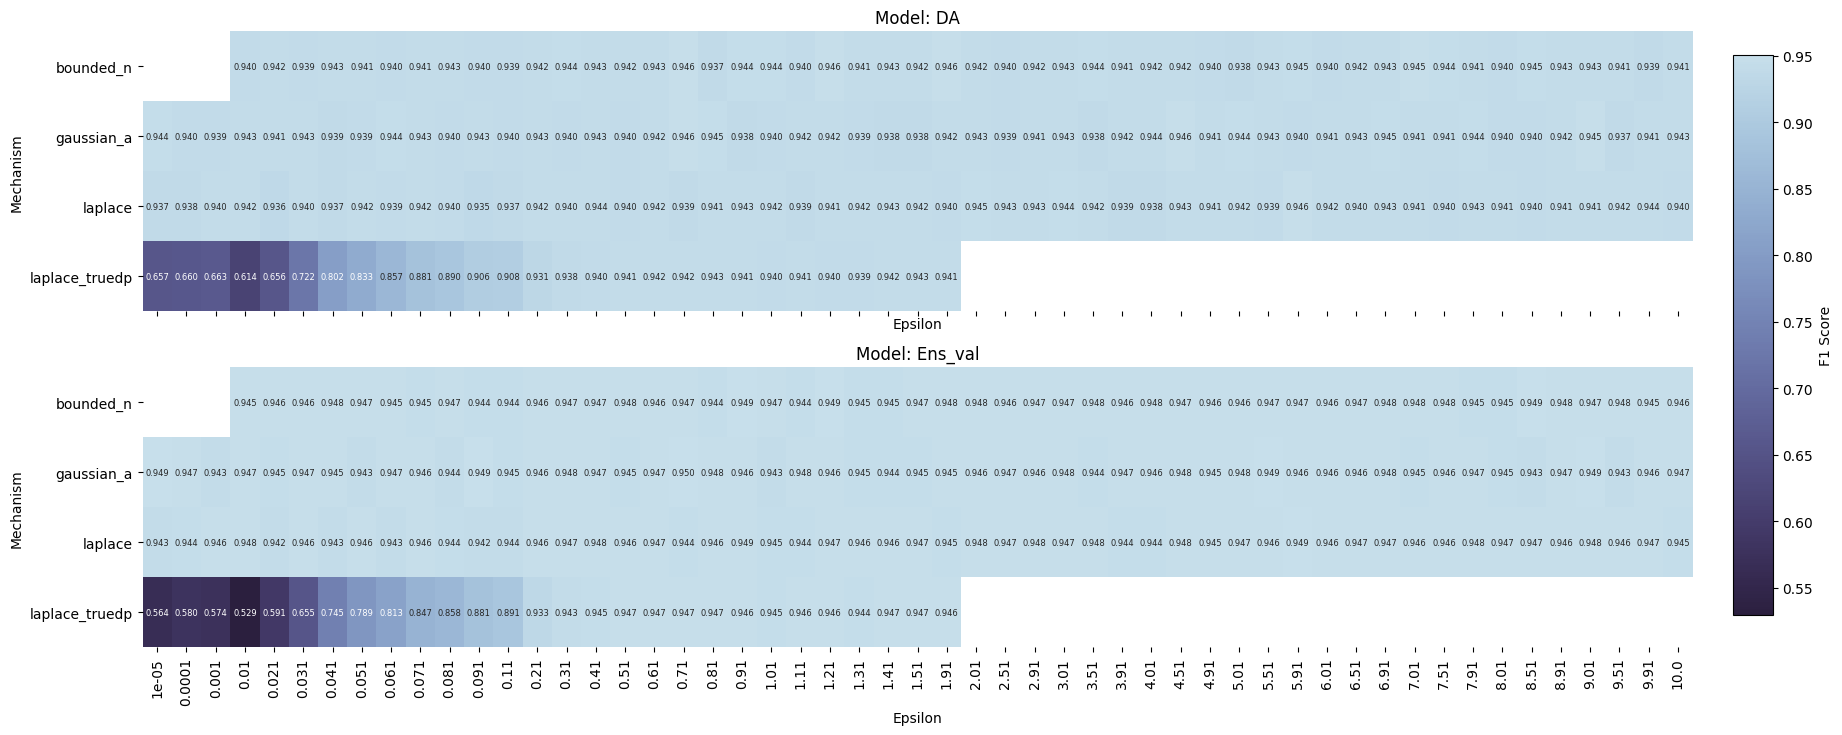

In [57]:
from matplotlib.cm import ScalarMappable
import matplotlib as mpl

# Get unique models
models = df_results_f1["Model"].unique()
epsilon_order = sorted(df_results_f1["Epsilon"].unique())

# Setup figure with one subplot per model
fig, axes = plt.subplots(
    nrows=len(models), 
    ncols=1, 
    figsize=(20, 4 * len(models)), 
    sharex=True
    )

# # Normalize axes handling for single model case
# if len(models) == 1:
#     axes = [axes]

# Set common color scale range for all heatmaps
vmin = df_results_f1["Value"].min()
vmax = df_results_f1["Value"].max()
cmap = sns.color_palette("ch:s=.25,rot=-.25_r", as_cmap=True)


# Plot one heatmap per model
for i, model in enumerate(models):
    data = df_results_f1[df_results_f1["Model"] == model]
    heatmap_data = data.pivot(index="Method", columns="Epsilon", values="Value").reindex(columns=epsilon_order)

    sns.heatmap(
        heatmap_data,
        ax=axes[i],
        annot=True,
        fmt=".3f",
        cmap=cmap,
        cbar=False,
        vmin=vmin,
        vmax=vmax,
        annot_kws={"size": 6}
    )
    axes[i].set_title(f"Model: {model}")
    axes[i].set_ylabel("Mechanism")

    if i == len(models) - 1:
        axes[i].set_xlabel("Epsilon")

# Add single colorbar aligned to the full figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, cax=cbar_ax, label="F1 Score")

plt.subplots_adjust(right=0.9)
plt.show()


In [43]:
df_results_small_e = df_results_f1[df_results_f1["Epsilon"] < 2.01]

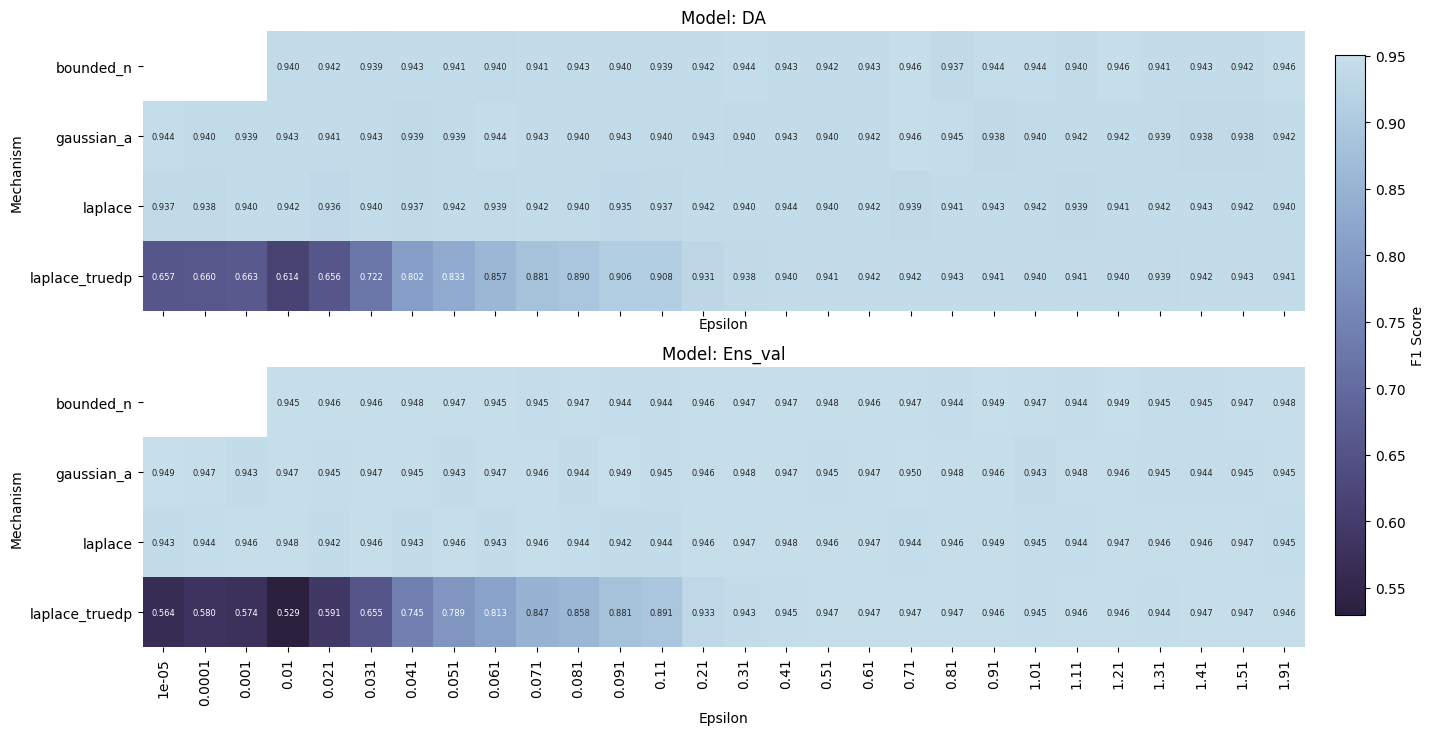

In [58]:
# Get unique models
models = df_results_small_e["Model"].unique()
epsilon_order = sorted(df_results_small_e["Epsilon"].unique())

# Setup figure with one subplot per model
fig, axes = plt.subplots(
    nrows=len(models), 
    ncols=1, 
    figsize=(15, 4 * len(models)), 
    sharex=True
    )

# Set common color scale range for all heatmaps
vmin = df_results_small_e["Value"].min()
vmax = df_results_small_e["Value"].max()
cmap = sns.color_palette("ch:s=.25,rot=-.25_r", as_cmap=True)


# Plot one heatmap per model
for i, model in enumerate(models):
    data = df_results_small_e[df_results_small_e["Model"] == model]
    heatmap_data = data.pivot(index="Method", columns="Epsilon", values="Value").reindex(columns=epsilon_order)

    sns.heatmap(
        heatmap_data,
        ax=axes[i],
        annot=True,
        fmt=".3f",
        cmap=cmap,
        cbar=False,
        vmin=vmin,
        vmax=vmax,
        annot_kws={"size": 6}
    )
    axes[i].set_title(f"Model: {model}")
    axes[i].set_ylabel("Mechanism")

    if i == len(models) - 1:
        axes[i].set_xlabel("Epsilon")

# Add single colorbar aligned to the full figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, cax=cbar_ax, label="F1 Score")

plt.subplots_adjust(right=0.9)
plt.show()


### Lineplots

#### F1 vs Epsilon

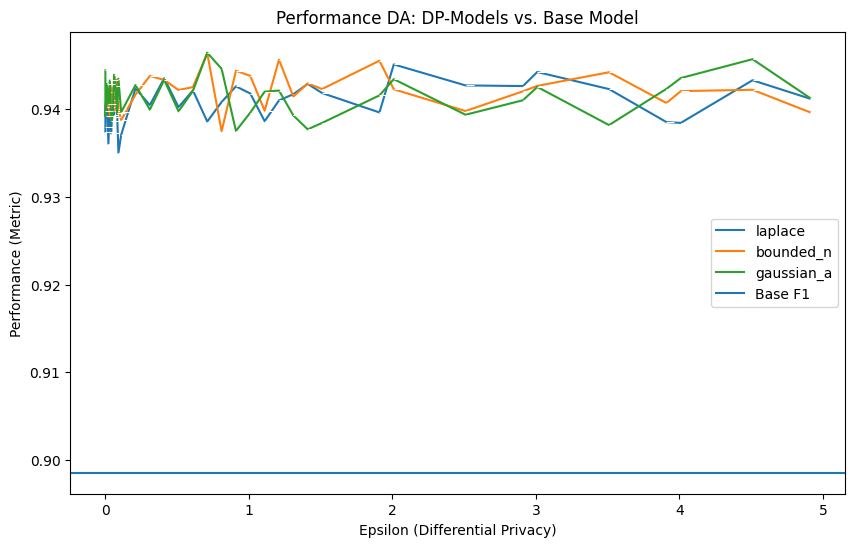

In [ ]:
df_f1_da     = df_performances[(df_performances["Metric"] == "f1") & (df_performances["Model"] == "DA")]
dp_perf_da   = df_f1_da[df_f1_da["Epsilon"] <= 5]
real_perf_da = df_f1_da[df_f1_da["Method"] == "no_dp"]["Value"].values[0]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=dp_perf_da,
    x="Epsilon", 
    y="Value", 
    hue="Method", 
    marker=True
)

plt.axhline(y=real_perf_da, linestyle="-", label=f"Base F1")
# plt.xscale("log") 
plt.xlabel("Epsilon (Differential Privacy)")
plt.ylabel("F1-Score")
plt.title("Performance DA: DP-Models vs. Base Model")
plt.legend()
plt.show()

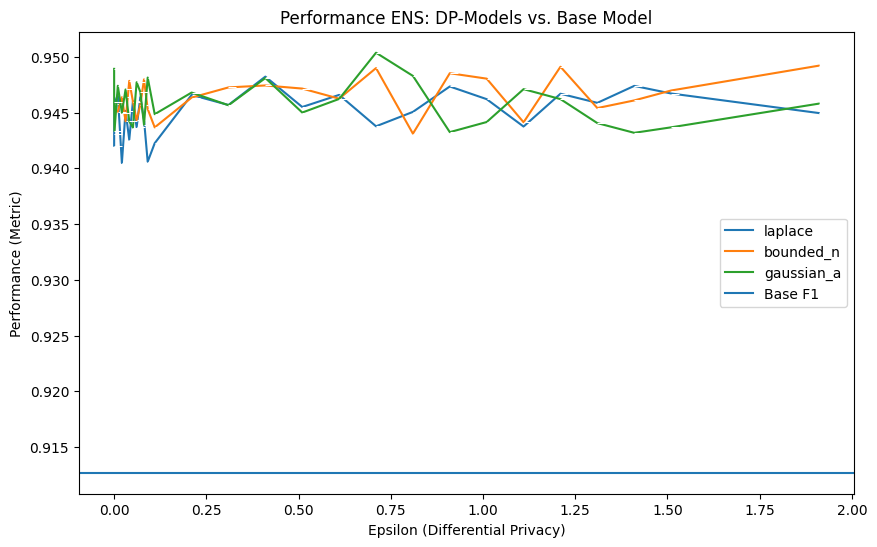

In [46]:
df_f1_ens      = df_performances[(df_performances["Metric"] == "f1") & (df_performances["Model"] == "ENS")]
dp_perf_ens   = df_f1_ens[df_f1_ens["Epsilon"] <= 2]
real_perf_ens = df_f1_ens[df_f1_ens["Method"] == "no_dp"]["Value"].values[0]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=dp_perf_ens,
    x="Epsilon", 
    y="Value", 
    hue="Method", 
    marker=True
)

plt.axhline(y=real_perf_ens, linestyle="-", label=f"Base F1")
# plt.xscale("log") 
plt.xlabel("Epsilon (Differential Privacy)")
plt.ylabel("Performance (Metric)")
plt.title("Performance ENS: DP-Models vs. Base Model")
plt.legend()
plt.show()

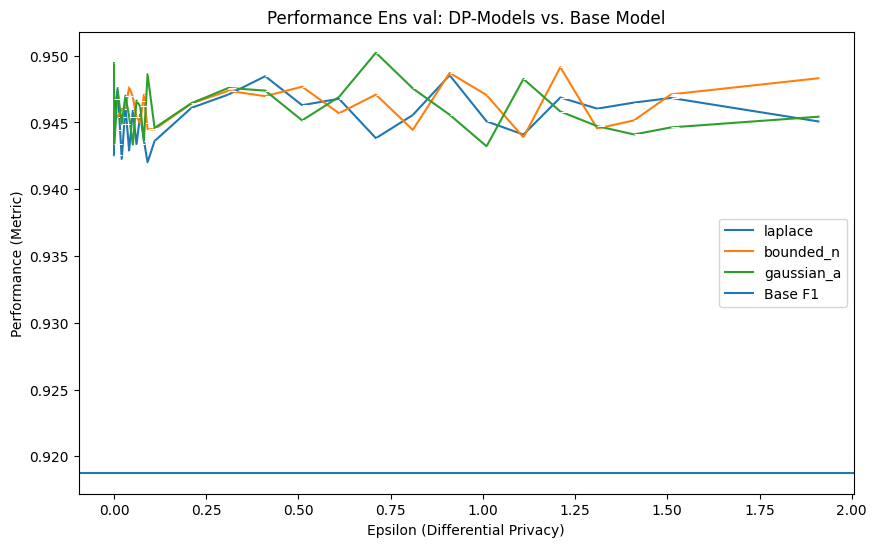

In [47]:
df_f1_val     = df_performances[(df_performances["Metric"] == "f1") & (df_performances["Model"] == "Ens_val")]
dp_perf_val   = df_f1_val[df_f1_val["Epsilon"] <= 2]
real_perf_val = df_f1_val[df_f1_val["Method"] == "no_dp"]["Value"].values[0]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=dp_perf_val,
    x="Epsilon", 
    y="Value", 
    hue="Method", 
    marker=True
)

plt.axhline(y=real_perf_val, linestyle="-", label=f"Base F1")
# plt.xscale("log") 
plt.xlabel("Epsilon (Differential Privacy)")
plt.ylabel("Performance (Metric)")
plt.title("Performance Ens val: DP-Models vs. Base Model")
plt.legend()
plt.show()

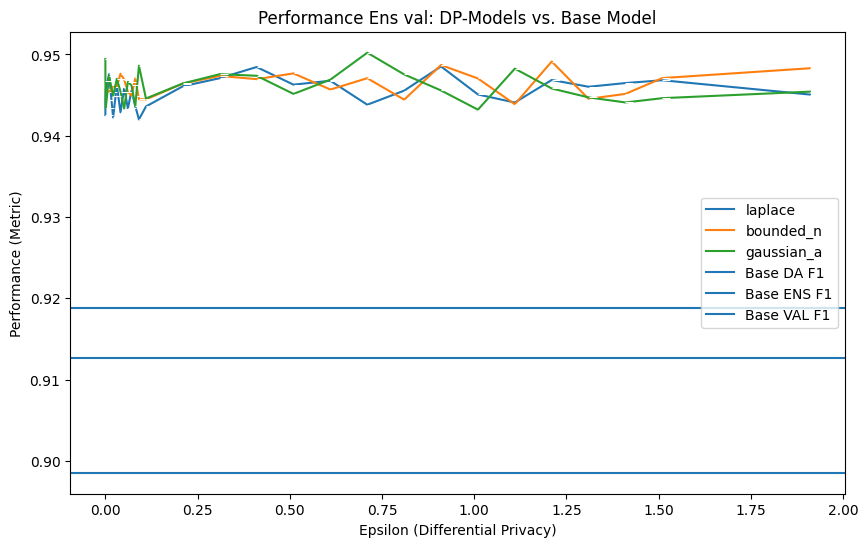

In [48]:

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=dp_perf_val,
    x="Epsilon", 
    y="Value", 
    hue="Method", 
    marker=True
)

plt.axhline(y=real_perf_da, linestyle="-", label=f"Base DA F1")
plt.axhline(y=real_perf_ens, linestyle="-", label=f"Base ENS F1")
plt.axhline(y=real_perf_val, linestyle="-", label=f"Base VAL F1")
# plt.xscale("log") 
plt.xlabel("Epsilon (Differential Privacy)")
plt.ylabel("Performance (Metric)")
plt.title("Performance Ens val: DP-Models vs. Base Model")
plt.legend()
plt.show()

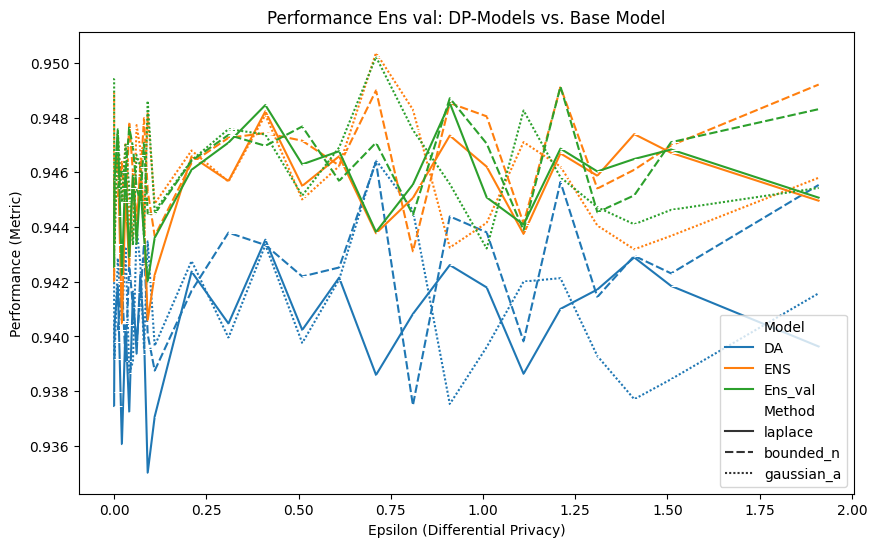

In [49]:
df_f1_dp = df_performances[(df_performances["Metric"] == "f1") & (df_performances["Epsilon"] <= 2)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_f1_dp,
    x="Epsilon", 
    y="Value", 
    hue="Model", 
    style="Method",
    marker=True
)

# plt.xscale("log") 
plt.xlabel("Epsilon (Differential Privacy)")
plt.ylabel("Performance (Metric)")
plt.title("Performance Ens val: DP-Models vs. Base Model")
plt.legend()
plt.show()

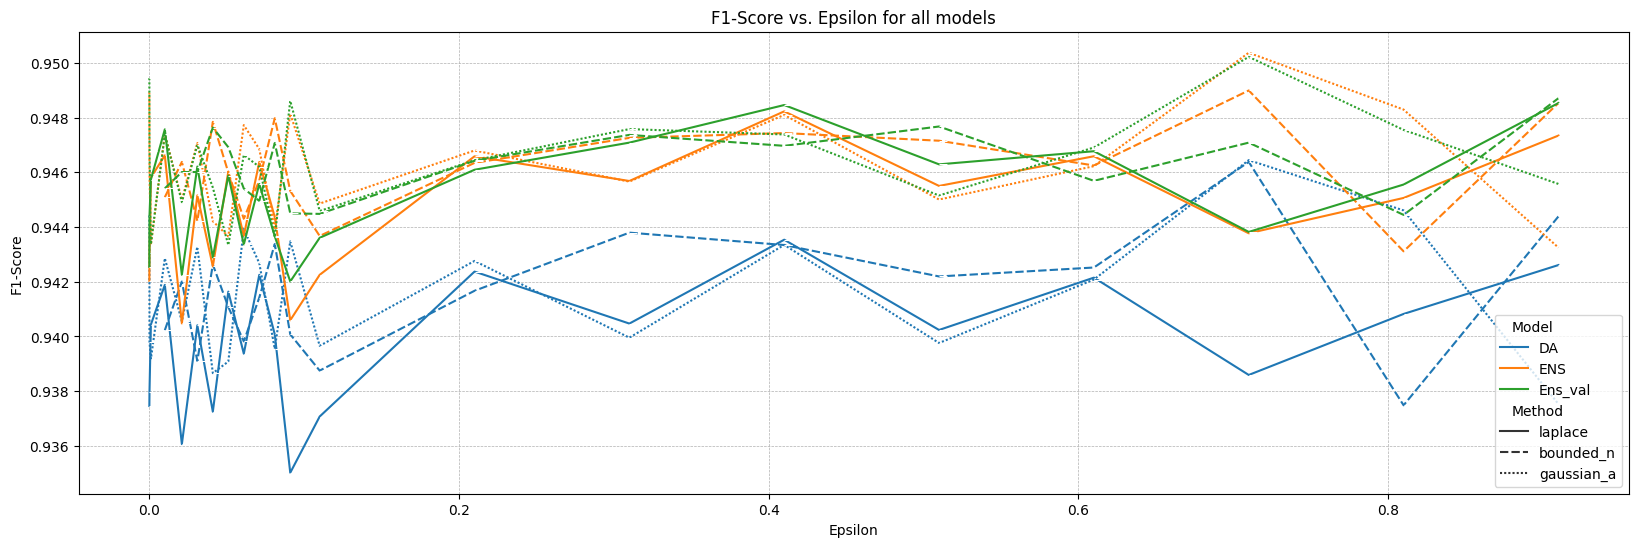

In [ ]:
df_f1 = df_performances[(df_performances["Metric"] == "f1") & (df_performances["Epsilon"] <= 1)] 

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_f1, x="Epsilon", y="Value", hue="Model", style="Method", marker=True, dashes=True)

# plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("F1-Score")
plt.title("F1-Score vs. Epsilon for all models")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

#### Specificity vs Epsilon

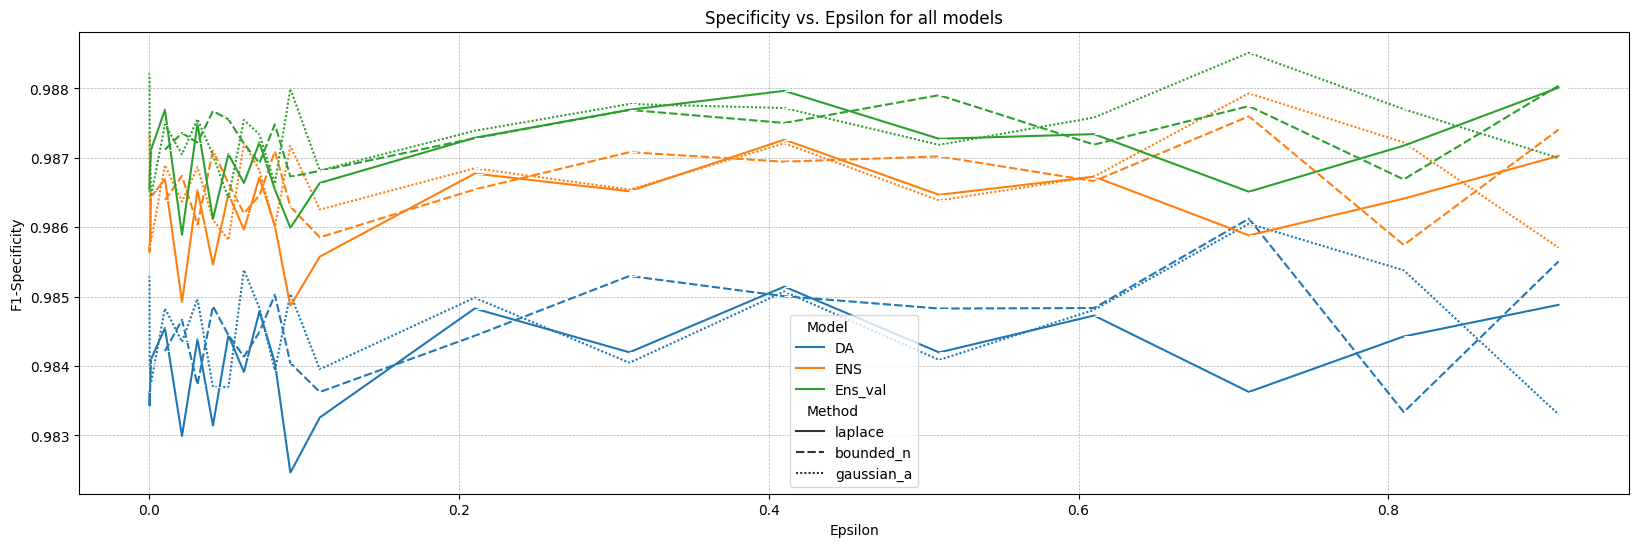

In [ ]:
df_spe = df_performances[(df_performances["Metric"] == "spe") & (df_performances["Epsilon"] <= 1)] 

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_spe, x="Epsilon", y="Value", hue="Model", style="Method", marker=True, dashes=True)

# plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("Specificity")
plt.title("Specificity vs. Epsilon for all models")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

#### Precision vs Epsilon

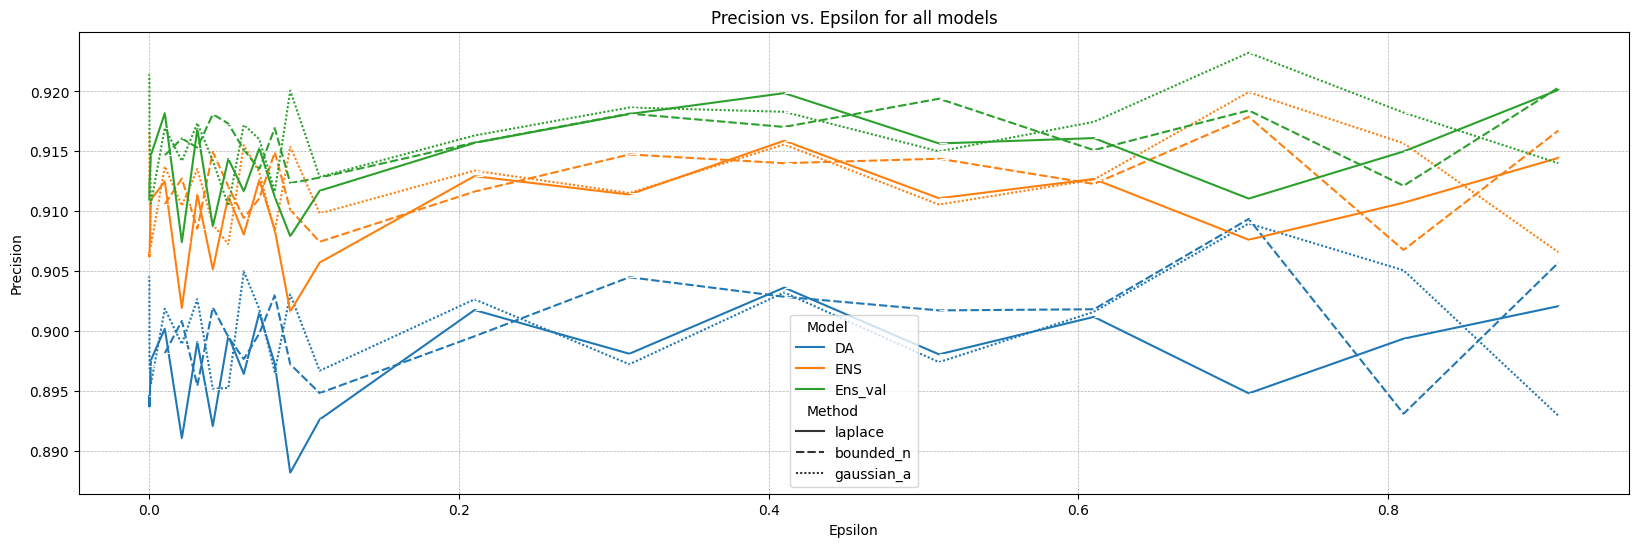

In [59]:
df_pre = df_performances[(df_performances["Metric"] == "pre") & (df_performances["Epsilon"] <= 1)] 

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_pre, x="Epsilon", y="Value", hue="Model", style="Method", marker=True, dashes=True)

# plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("Precision")
plt.title("Precision vs. Epsilon for all models")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

#### Accuracy vs Epsilon

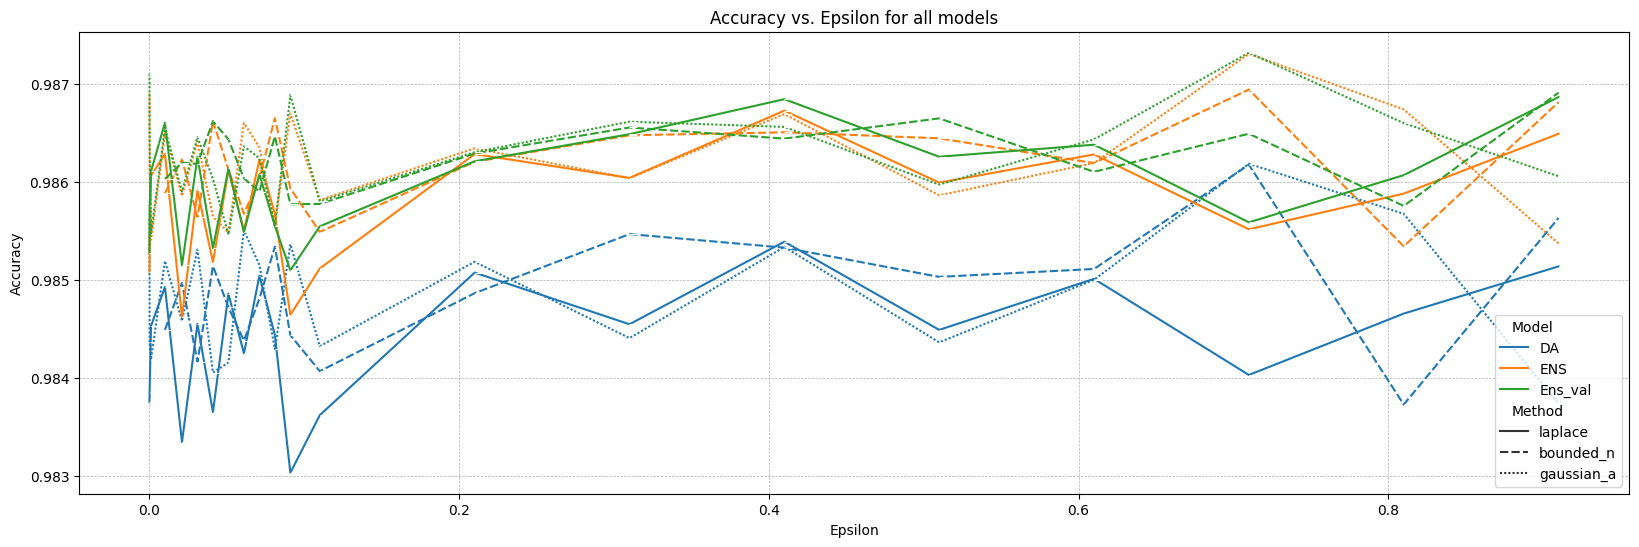

In [60]:
df_acc = df_performances[(df_performances["Metric"] == "acc") & (df_performances["Epsilon"] <= 1)] 

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_acc, x="Epsilon", y="Value", hue="Model", style="Method", marker=True, dashes=True)

# plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epsilon for all models")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

Recall vs. Epsilon

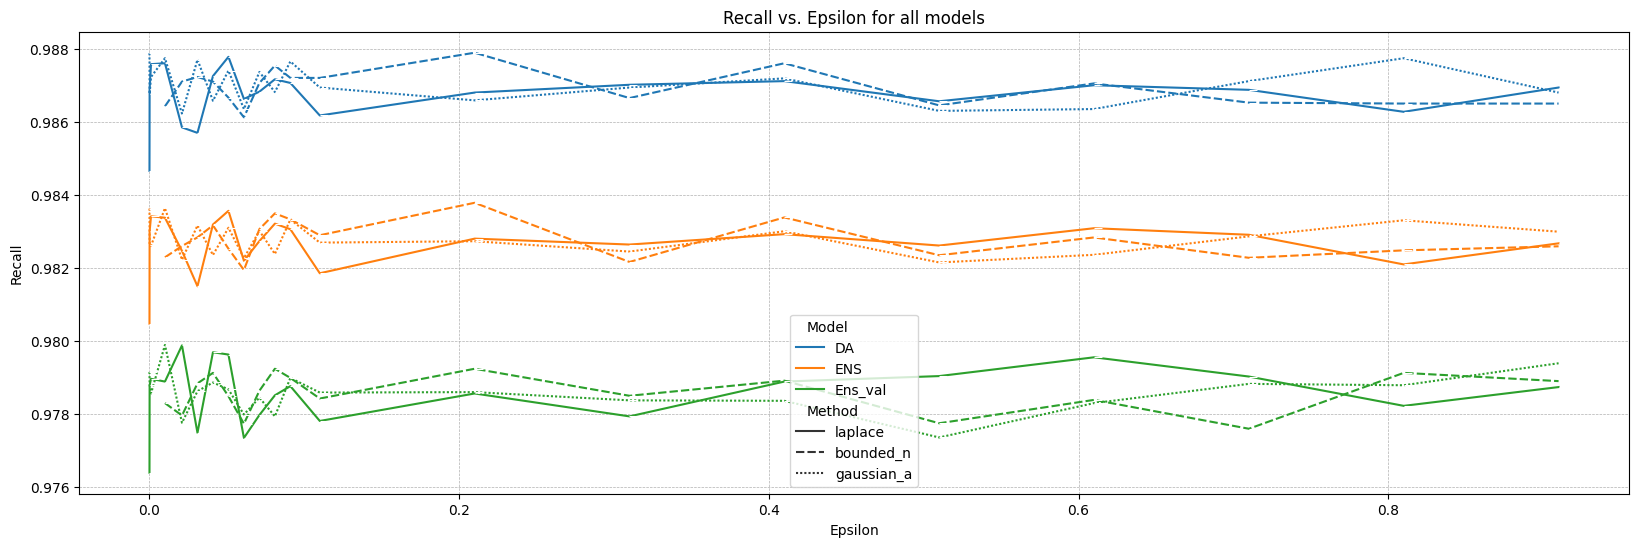

In [61]:
df_rec = df_performances[(df_performances["Metric"] == "rec") & (df_performances["Epsilon"] <= 1)] 

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_rec, x="Epsilon", y="Value", hue="Model", style="Method", marker=True, dashes=True)

# plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("Recall")
plt.title("Recall vs. Epsilon for all models")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

#### NPV vs Epsilon

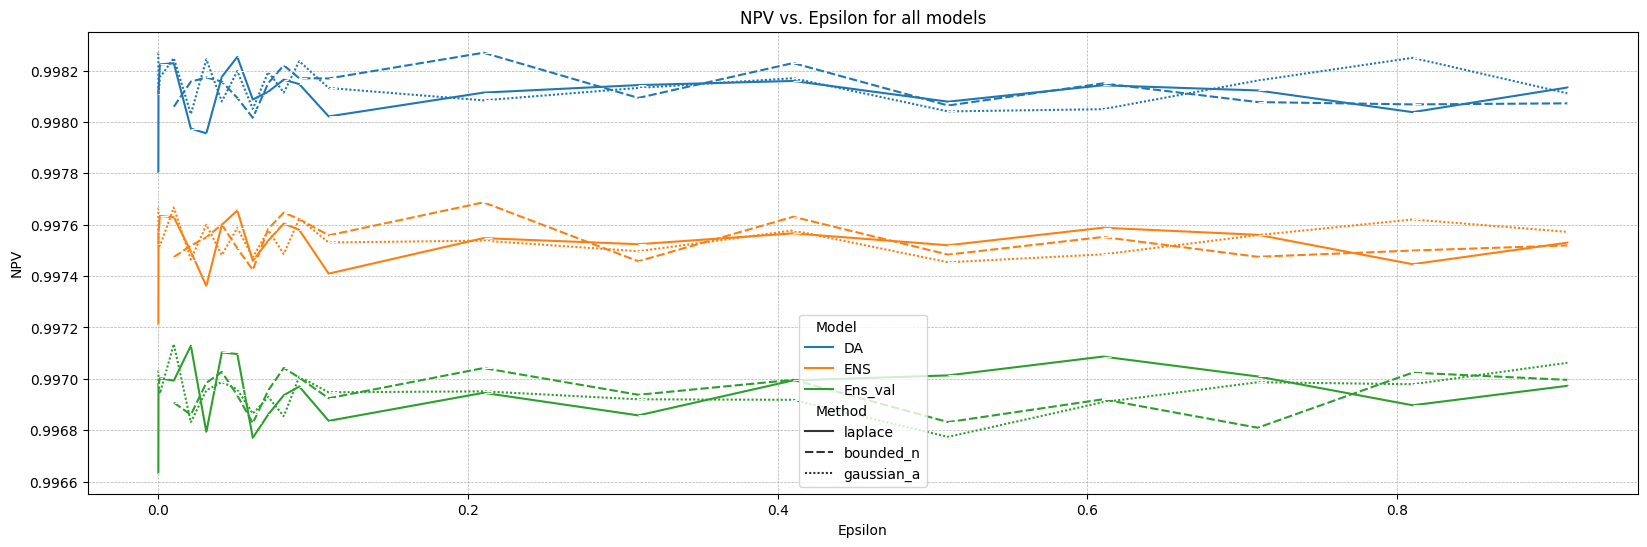

In [62]:
df_npv = df_performances[(df_performances["Metric"] == "npv") & (df_performances["Epsilon"] <= 1)] 

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_npv, x="Epsilon", y="Value", hue="Model", style="Method", marker=True, dashes=True)

# plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("NPV")
plt.title("NPV vs. Epsilon for all models")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

#### all metrics vs epsilon

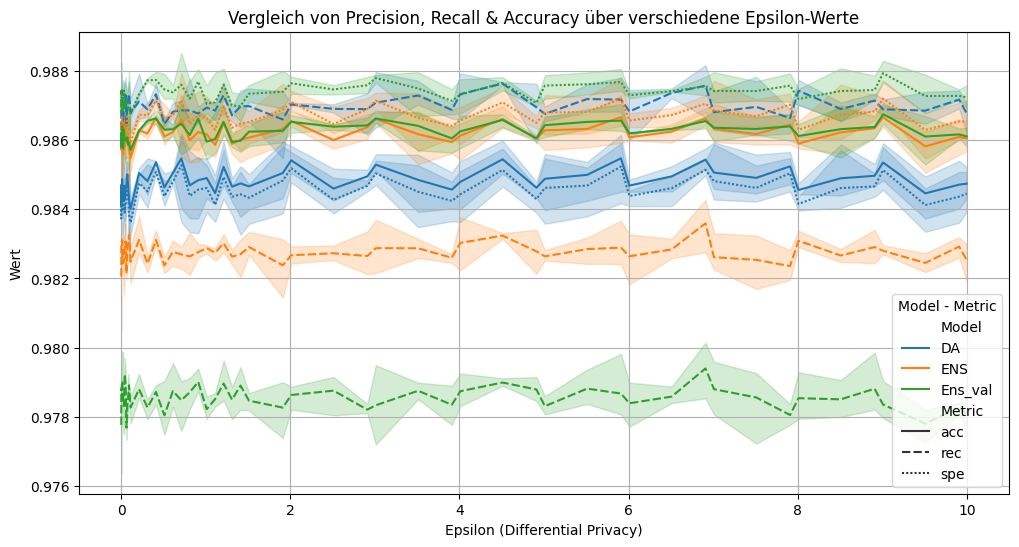

In [ ]:
# metrics_of_interest = ["pre", "rec", "spe", "acc"]
metrics_of_interest = ["rec", "spe", "acc"]
df_selected = df_performances[(df_performances["Metric"].isin(metrics_of_interest))]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_selected, 
    x="Epsilon", 
    y="Value", 
    hue="Model", 
    style="Metric", 
    dashes=True
)

# plt.xscale("log") 
plt.xlabel("Epsilon (Differential Privacy)")
plt.ylabel("Value")
plt.title("Precision, Recall & Accuracy per Epsilon")
plt.grid(True)
plt.show()


### Boxplot

#### avg F1 for all models

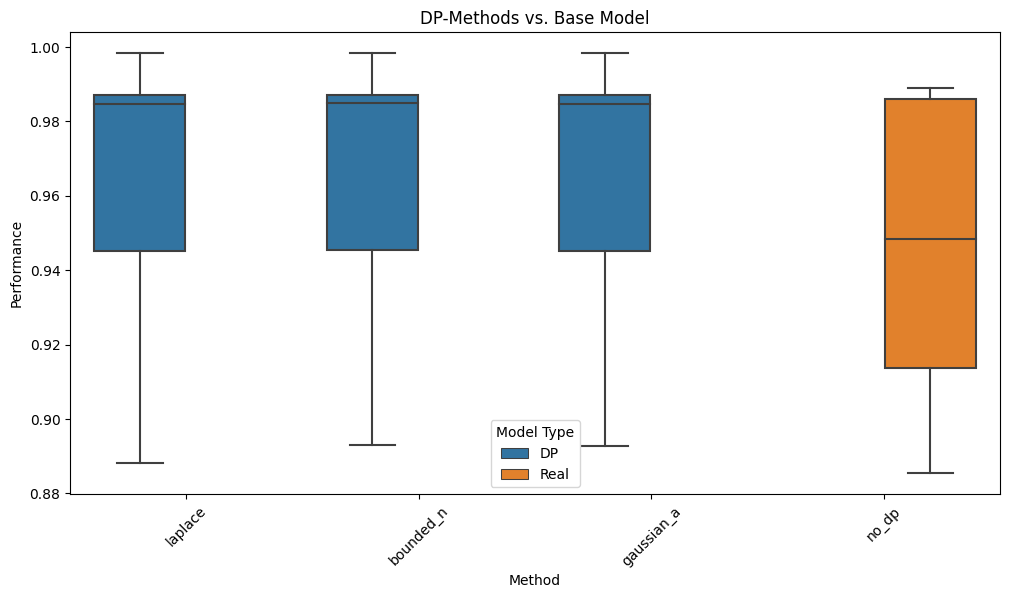

In [51]:
df_f1 = df_performances[(df_performances["Metric"] == "f1")] 

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_performances, x="Method", y="Value", hue=df_performances["Epsilon"].isna().map({True: "Real", False: "DP"}))
plt.ylabel("Performance")
plt.xlabel("Method")
plt.title("DP-Methods vs. Base Model")
plt.xticks(rotation=45)
plt.legend(title="Model Type")
plt.show()

### Scatterplot

#### F1 vs Epsilon - all models

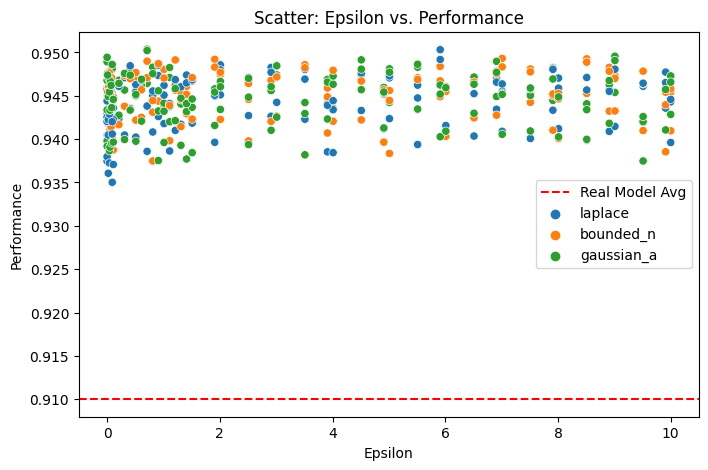

In [ ]:
df_f1 = df_performances[(df_performances["Metric"] == "f1")] 

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_f1[df_f1["Epsilon"].notna()],
    x="Epsilon",
    y="Value",
    hue="Method"
)

plt.axhline(df_f1[df_f1["Epsilon"].isna()]["Value"].mean(), linestyle="--", color="red", label="Real Model Avg")
# plt.xscale("log")
plt.xlabel("Epsilon")
plt.ylabel("F1-Score")
plt.title("Scatter: Epsilon vs. Performance")
plt.legend()
plt.show()

### Heatmap

#### F1 vs epsilon per mechanism

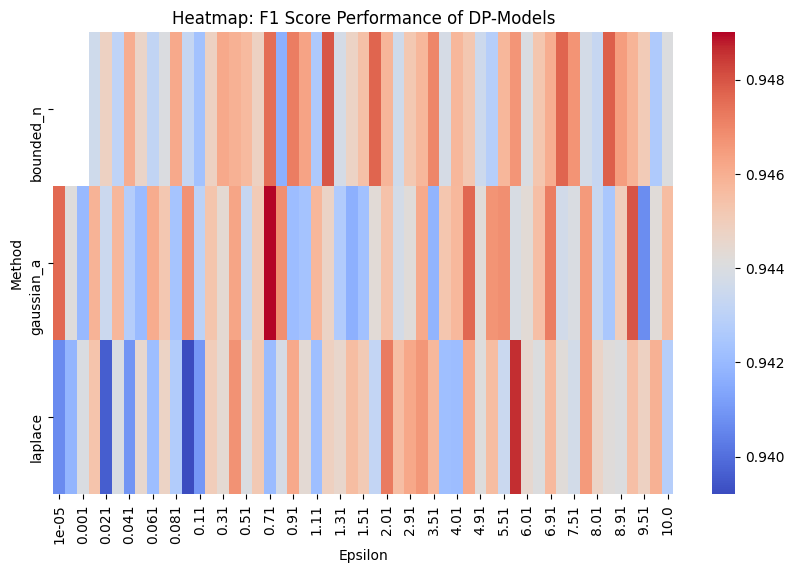

In [64]:
df_f1 = df_performances[(df_performances["Metric"] == "f1")] 

pivot_table = df_f1.pivot_table(values="Value", index="Method", columns="Epsilon")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False, fmt=".2f")
plt.xlabel("Epsilon")
plt.ylabel("Method")
plt.title("Heatmap: F1 Score Performance of DP-Models")
plt.show()

#### all metrics vs epsilon per mechanism

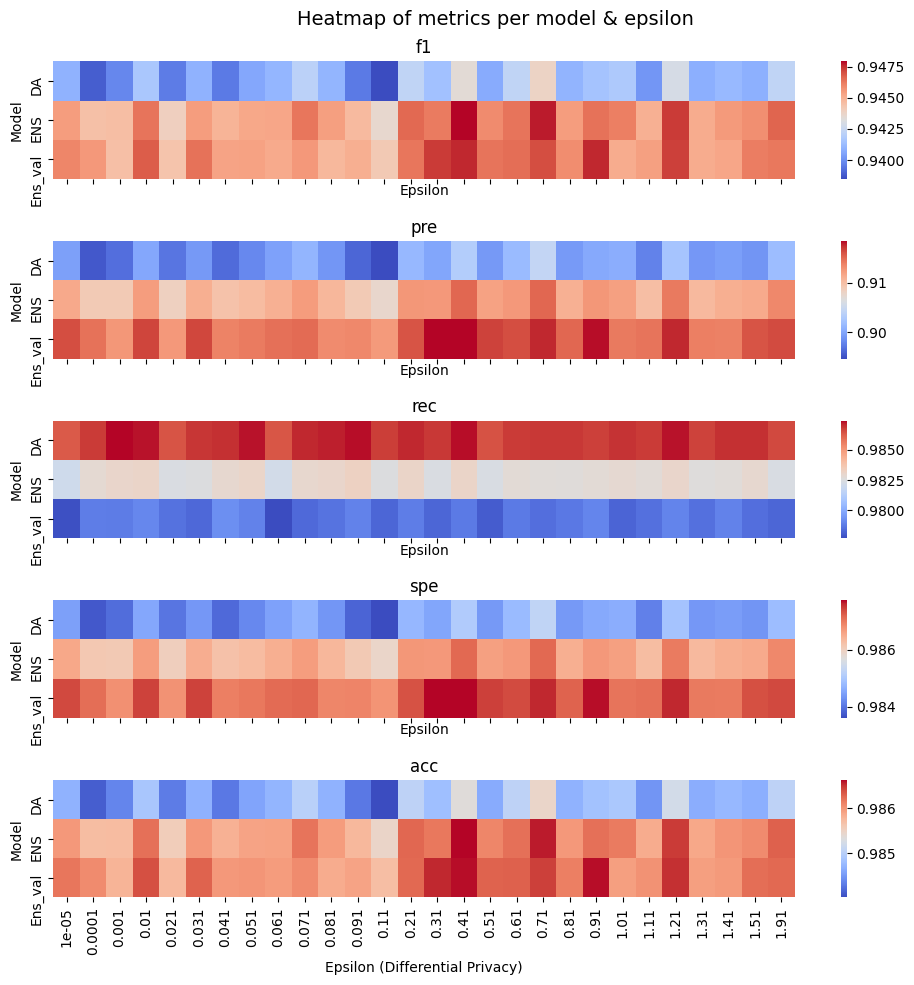

In [74]:
metrics_of_interest = ["f1", "pre", "rec", "spe", "acc"]
df_selected = df_performances[(df_performances["Metric"].isin(metrics_of_interest)) & (df_performances["Epsilon"] <= 2)]

# df_pivot = df_selected.pivot_table(index=["Method", "Metric"], columns="Epsilon", values="Value", aggfunc="mean")

# plt.figure(figsize=(12, 6))
# sns.heatmap(df_pivot, cmap="coolwarm", annot=False, cbar=True)
# plt.xlabel("Epsilon (Differential Privacy)")
# plt.ylabel("Model & Metric")
# plt.title("Heatmap der Metriken pro Model & Epsilon")
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.show()

fig, axes = plt.subplots(5, 1, figsize=(10, 10), sharex=True, sharey=True)  # 5 rows, same axes

for i, metric in enumerate(metrics_of_interest):  
    df_pivot = df_selected[df_selected["Metric"] == metric].pivot_table(index="Model", columns="Epsilon", values="Value", aggfunc="mean")
    
    vmin = df_pivot.min().min()
    vmax = df_pivot.max().max()
    
    sns.heatmap(df_pivot, cmap="coolwarm", annot=False, cbar=True, ax=axes[i], vmin=vmin, vmax=vmax)
    
    axes[i].set_title(metric)
    if i == 4:
        axes[i].set_ylabel("Model") 
        axes[i].set_xlabel("Epsilon (Differential Privacy)")

plt.suptitle("Heatmap of metrics per model & epsilon", fontsize=14)
plt.tight_layout()
plt.show()


## Privacy Evaluation

In [ ]:
def load_attack_performance(attack):    
    with open(osj("..", "dp_models", "attacks", f"{attack}_performance.pkl"), "rb") as f:
        metrics = pickle.load(f) 
    return metrics

In [ ]:
mia_perf = load_attack_performance("MIA")
data = []

for model in mia_perf.keys():
    for mechanism in mia_perf[model].keys():
        if mechanism == "no_dp":
            for metric, value in mia_perf[model][mechanism].items():
                record = {"Model": model, "Method": mechanism, "Epsilon": None, "Metric": metric, "Value": value}
                data.append(record)
        else:
            for epsilon, metrics in mia_perf[model][mechanism].items():
                for metric, value in mia_perf[model][mechanism][epsilon].items():
                    record = {"Model": model, "Method": mechanism, "Epsilon": epsilon, "Metric": metric, "Value": value}
                    data.append(record)

df_mia_perf = pd.DataFrame(data, columns=["Model", "Method", "Epsilon", "Metric", "Value"])

In [5]:
df_mia_perf

Model      Method  Epsilon Metric     Value
0         DA_shadow       no_dp      NaN    acc  0.580862
1         DA_shadow       no_dp      NaN    rec  0.705935
2         DA_shadow       no_dp      NaN    pre  0.641232
3         DA_shadow       no_dp      NaN     f1  0.672030
4         DA_shadow     laplace     0.31    acc  0.589590
..              ...         ...      ...    ...       ...
123  Ens_val_shadow  gaussian_a     0.91     f1  0.684028
124  Ens_val_shadow  gaussian_a     1.21    acc  0.589710
125  Ens_val_shadow  gaussian_a     1.21    rec  0.738429
126  Ens_val_shadow  gaussian_a     1.21    pre  0.645620
127  Ens_val_shadow  gaussian_a     1.21     f1  0.688913

[128 rows x 5 columns]

In [6]:
df_mia_perf["Model"].value_counts()

Ens_val_shadow    64
DA_shadow         64
Name: Model, dtype: int64

In [ ]:
np.set_printoptions(suppress=True) 
df_mia_perf["Epsilon"].unique()

array([ nan, 0.31, 0.41, 0.71, 0.91, 1.21])

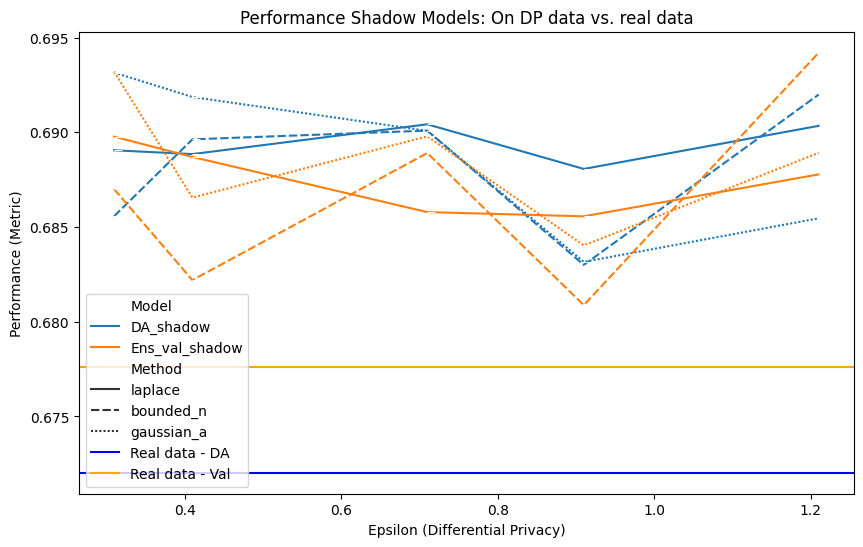

In [13]:
df_f1_mia     = df_mia_perf[(df_mia_perf["Metric"] == "f1")]
dp_perf_mia   = df_f1_mia[df_f1_mia["Epsilon"] >= 0]
real_perf_mia_da  = df_f1_mia[(df_f1_mia["Method"] == "no_dp") & (df_f1_mia["Model"] == "DA_shadow")]["Value"].values[0]
real_perf_mia_val = df_f1_mia[(df_f1_mia["Method"] == "no_dp") & (df_f1_mia["Model"] == "Ens_val_shadow")]["Value"].values[0]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=dp_perf_mia,
    x="Epsilon", 
    y="Value", 
    hue="Model",
    style="Method", 
    marker=True
)

plt.axhline(y=real_perf_mia_da, linestyle="-", label=f"Real data - DA", color="blue")
plt.axhline(y=real_perf_mia_val, linestyle="-", label=f"Real data - Val", color="orange")
# plt.xscale("log") 
plt.xlabel("Epsilon (Differential Privacy)")
plt.ylabel("Performance (Metric)")
plt.title("Performance Shadow Models: On DP data vs. real data")
plt.legend()
plt.show()